# Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime

# encoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import files

In [4]:
uploaded_train = files.upload()

Saving loan_data_2007_2014.csv to loan_data_2007_2014.csv


# Data Train

## Data Preprocessing

### Load Data

In [142]:
# load data
df_train = pd.read_csv('loan_data_2007_2014.csv')

In [143]:
df_train

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

### Data Cleaning

In [144]:
df_train.shape

(466285, 75)

In [145]:
# melihat missing value dan duplicate value

datasets = [df_train]
titles = ['data_train']

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='Greens_r')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,data_train,"Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m",466285,75,0,9776227,"emp_title, emp_length, annual_inc, desc, title, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_util, total_acc, last_pymnt_d, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m"


In [146]:
#df_train = df_train.drop_duplicates(keep='first')
#print(df_train)

In [147]:
df_train['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'MecÃ¡nica',
       'Chief of Interpretation (Park Ranger)', 'Server Engineer Lead'],
      dtype=object)

In [148]:
df_train['emp_title'].sample(10)

242281                     Payroll Manager
222895    Dwayne Lanes Arlington Chevrolet
112034             Forrest Solutions Group
350518                               Clerk
150439                                 NaN
254280         Employee Service Supervisor
308228        Senior Systems Administrator
291952                   Email specialist 
302940                 IT Business Analyst
186094                   BBVA Compass bank
Name: emp_title, dtype: object

In [149]:
df_train = df_train.replace(to_replace ='MecÃ¡nica', value = 'Mechanic', regex = True)

In [150]:
df_train['emp_title'].fillna('Unknown',inplace=True)

In [151]:
df_train[df_train['emp_title'] == 'Unknown'].sample(20)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
7131,7131,887079,1103103,3000,3000,3000.0,60 months,14.27,70.23,C,C2,Unknown,NaN,RENT,15240.0,Verified,Sep-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,personal,852xx,AZ,4.25,0.0,Nov-00,1.0,NaN,NaN,4.0,0.0,1130,80.7,9.0,f,0.00,0.00,3907.311588,3907.31,3000.00,907.31,0.0,0.0,0.0,Jun-14,1739.70,NaN,Jun-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430223,430223,12655855,14658007,25000,25000,25000.0,60 months,24.08,720.37,F,F2,Unknown,NaN,RENT,60000.0,Verified,Mar-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 03/07/14 > to consolidate ...,debt_consolidation,Debt consolidation,956xx,CA,22.70,0.0,Aug-99,0.0,NaN,NaN,12.0,0.0,22906,81.5,23.0,f,0.00,0.00,4322.220000,4322.22,1379.84,2942.38,0.0,0.0,0.0,Sep-14,720.37,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,23959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28100.0,NaN,NaN,NaN
260507,260507,34031995,36695270,12000,12000,12000.0,60 months,18.54,308.26,E,E1,Unknown,NaN,MORTGAGE,50820.0,Verified,Nov-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,935xx,CA,22.61,0.0,Dec-00,1.0,57.0,59.0,13.0,2.0,15541,59.1,28.0,w,0.00,0.00,13273.120000,13273.12,12000.00,1273.12,0.0,0.0,0.0,Jun-15,11435.92,NaN,Jun-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,225620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26300.0,NaN,NaN,NaN
265898,265898,33180322,35823551,6250,6250,6250.0,36 months,13.35,211.65,C,C2,Unknown,NaN,MORTGAGE,21120.0,Verified,Nov-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,463xx,IN,24.83,0.0,Feb-03,0.0,NaN,NaN,8.0,0.0,38617,73.0,11.0,w,0.00,0.00,6526.550000,6526.55,6250.00,276.55,0.0,0.0,0.0,Mar-15,5896.24,NaN,Mar-15,0.0,43.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,150107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52700.0,NaN,NaN,NaN
184887,184887,2064590,2406741,10000,10000,10000.0,36 months,13.11,337.47,B,B4,Unknown,NaN,OTHER,42960.0,Verified,Nov-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 11/15/12 > I need the loan...,home_improvement,home improvement,285xx,NC,15.05,0.0,Sep-94,2.0,NaN,NaN,12.0,0.0,15656,61.9,14.0,f,0.00,0.00,12148.902150,12148.90,10000.00,2148.90,0.0,0.0,0.0,Dec-15,337.45,NaN,Nov-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,16450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25300.0,NaN,NaN,NaN
328070,328070,23233092,25585987,26125,26125,26125.0,36 months,19.52,964.53,E,E2,Unknown,NaN,MORTGAGE,101715.0,Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,305xx,GA,26.45,2.0,Sep-82,1.0,10.0,NaN,12.0,0.0,15376,75.7,34.0,w,4532.57,4532.57,26365.560000,26365.56,21592.43,4773.13,0.0,0.0,0.0,Dec-15,964.53,Feb-16,Jan-16,0.0,10.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,274428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20300.0,NaN,NaN,NaN
61943,61943,8974875,10777015,15000,15000,15000.0

In [152]:
df_train['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [153]:
df_train['emp_length'] = df_train['emp_length'].replace(to_replace ="[%+ years]", value = '', regex = True)
df_train['emp_length'].fillna('0',inplace=True)

In [154]:
df_train['emp_length'].unique()

array(['10', '<1', '1', '3', '8', '9', '4', '5', '6', '2', '7', '0'],
      dtype=object)

In [155]:
df_train.rename(columns = {'emp_length':'emp_length_year'}, inplace = True)

In [156]:
df_train['emp_length_year'] = df_train['emp_length_year'].replace(to_replace ='<1', value = '0.3', regex = True)

In [157]:
df_train[['emp_length_year']] = df_train[['emp_length_year']].apply(pd.to_numeric)

In [158]:
df_train.rename(columns = {'term':'term_months'}, inplace = True)
df_train['term_months'] = df_train['term_months'].replace(to_replace ='60 months', value = '60', regex = True)
df_train['term_months'] = df_train['term_months'].replace(to_replace ='36 months', value = '36', regex = True)

In [159]:
df_train[['term_months']] = df_train[['term_months']].apply(pd.to_numeric)

In [160]:
df_train['desc'].fillna('no description',inplace=True)

In [161]:
df_train['mths_since_last_delinq'].fillna('0',inplace=True)
df_train['mths_since_last_record'].fillna('0',inplace=True)
df_train['mths_since_last_major_derog'].fillna('0',inplace=True)
df_train['delinq_2yrs'].fillna('0',inplace=True)
df_train['inq_last_6mths'].fillna('0',inplace=True)
df_train['pub_rec'].fillna('0',inplace=True)
df_train['collections_12_mths_ex_med'].fillna('0',inplace=True)

In [162]:
df_train['annual_inc'].fillna(0,inplace=True)
df_train['open_acc'].fillna(0,inplace=True)
df_train['revol_util'].fillna(0,inplace=True)
df_train['total_acc'].fillna(0,inplace=True)
df_train['acc_now_delinq'].fillna(0,inplace=True)
df_train['tot_cur_bal'].fillna(0,inplace=True)
df_train['total_rev_hi_lim'].fillna(0,inplace=True)

In [163]:
df_train['next_pymnt_d'].fillna('Paid',inplace=True)
df_train['title'].fillna('Untitled',inplace=True)

In [164]:
# melihat missing value dan duplicate value
datasets = [df_train]
titles = ['data_train']
data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='Greens_r')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,data_train,"Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term_months, int_rate, installment, grade, sub_grade, emp_title, emp_length_year, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m",466285,75,0,7997568,"earliest_cr_line, last_pymnt_d, last_credit_pull_d, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m"


In [165]:
df_train[df_train['last_pymnt_d'].isnull()].sample(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
258297,258297,34302683,36965993,20000,20000,20000.0,60,15.59,482.02,D,D1,Respiratory therapist,4.0,RENT,60000.0,Source Verified,Nov-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,920xx,CA,24.46,0.0,Nov-00,0.0,0,60.0,14.0,1.0,16279,49.3,46.0,w,0.0,0.0,2854.22,2854.22,0.0,0.0,0.0,2854.22,28.5422,NaN,0.0,Paid,Apr-15,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,78753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33000.0,NaN,NaN,NaN
296096,296096,28564736,31087981,5750,5750,5750.0,36,19.52,212.29,E,E2,Unknown,0.0,RENT,50000.0,Source Verified,Oct-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Car financing,791xx,TX,22.23,0.0,Mar-01,0.0,31.0,0,11.0,0.0,6126,48.2,31.0,w,0.0,0.0,834.27,834.27,0.0,0.0,0.0,834.27,8.3427,NaN,0.0,Paid,Mar-15,0.0,31.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,137211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12700.0,NaN,NaN,NaN
316279,316279,24665881,27098777,6725,6725,6725.0,36,16.99,239.74,D,D3,floral manager,10.0,RENT,54000.0,Source Verified,Aug-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,480xx,MI,23.07,0.0,Jan-01,0.0,24.0,0,9.0,0.0,3446,32.5,21.0,w,0.0,0.0,963.90,963.90,0.0,0.0,0.0,963.90,173.5020,NaN,0.0,Paid,Jan-15,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,700.0,41110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9900.0,NaN,NaN,NaN
85915,85915,7341408,9003326,6000,6000,6000.0,36,21.00,226.06,E,E1,WDS,5.0,RENT,38000.0,Not Verified,Sep-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Consolidation Loan,922xx,CA,16.55,0.0,Dec-05,2.0,0,0,7.0,0.0,5125,72.2,8.0,f,0.0,0.0,859.35,859.35,0.0,0.0,0.0,859.35,8.5935,NaN,0.0,Paid,Mar-14,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,13389.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7100.0,NaN,NaN,NaN
168659,168659,3239337,3982087,15000,15000,14975.0,36,8.90,476.30,A,A5,ATK,10.0,MORTGAGE,133000.0,Verified,Feb-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/22/13 > The proceeds wi...,debt_consolidation,Debt Consolidation,219xx,MD,22.69,0.0,Oct-90,1.0,0,0,10.0,0.0,47605,97.2,29.0,w,0.0,0.0,4587.07,4579.42,0.0,0.0,0.0,4587.07,767.9754,NaN,0.0,Paid,May-13,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,239224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51000.0,NaN,NaN,NaN
263361,263361,33331415,35974764,30000,30000,30000.0,36,18.24,1088.19,D,D5,Social Work Supervisor,3.0,MORTGAGE,69498.0,Verified,Oct-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,no description,home_improvement,Home improvement,874xx,NM,11.66,0.0,Nov-01,1.0,0,109.0,26.0,1.0,8760,29.8,44.0,w,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaN,0.0,Paid,Jan-16,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,206466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29400.0,NaN,NaN,NaN
405829,405829,14649630,16711938,17600,17600,17600.0,36,10.99,576.12,B,B2,General Manager,0.3,MORTGAGE,42000.0,

In [166]:
df_train['last_pymnt_d'].fillna('Paid',inplace=True)

In [167]:
df_train['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [168]:
df_train[df_train['last_credit_pull_d'].isnull()].sample(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
70508,70508,8605877,10357958,17825,17825,17825.0,36,17.76,642.28,D,D1,Operations Engineer,0.3,RENT,65000.0,Verified,Nov-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,pay off credit cards & loans,980xx,WA,13.22,0.0,Nov-02,1.0,32.0,0,10.0,0.0,14984,57.0,19.0,f,5248.55,5248.55,17199.19000,17199.19,12576.45,4622.74,0.0,0.00,0.00,Jan-16,642.28,Feb-16,NaN,0.0,32.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,15830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26300.0,NaN,NaN,NaN
71322,71322,8524993,10277117,11200,11200,11200.0,60,16.20,273.56,C,C4,Medical Assembler,7.0,MORTGAGE,55000.0,Source Verified,Nov-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Credit card payoff,087xx,NJ,12.65,0.0,Feb-07,1.0,0,0,13.0,0.0,8955,39.1,18.0,f,0.00,0.00,7112.53000,7112.53,3780.96,3331.57,0.0,0.00,0.00,Jan-16,7735.99,Paid,NaN,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,108962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22900.0,NaN,NaN,NaN
268759,268759,32459425,35082688,25000,25000,25000.0,36,13.35,846.57,C,C2,Regional Contracts Coordinator,10.0,MORTGAGE,68500.0,Source Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,302xx,GA,25.05,1.0,Oct-79,0.0,15.0,44.0,10.0,1.0,21077,95.8,35.0,w,16439.88,16439.88,11814.42000,11814.42,8560.12,3254.30,0.0,0.00,0.00,Jan-16,827.55,Feb-16,NaN,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,311988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22000.0,NaN,NaN,NaN
26094,26094,575712,740467,5000,5000,5000.0,36,11.12,163.98,B,B3,Unknown,5.0,RENT,96000.0,Not Verified,Sep-10,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,no description,small_business,for my toy business,900xx,CA,4.04,0.0,Oct-97,0.0,0,0,4.0,0.0,7172,80.6,9.0,f,0.00,0.00,3362.96000,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,Paid,NaN,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
246515,246515,35186548,37877939,1500,1500,1500.0,36,11.44,49.43,B,B4,director of marketing/commercial realtor,10.0,RENT,120000.0,Source Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,no description,major_purchase,Major purchase,386xx,MS,1.94,0.0,Jun-95,0.0,57.0,60.0,4.0,1.0,880,27.0,27.0,f,1016.25,1016.25,641.64000,641.64,483.75,157.89,0.0,0.00,0.00,Dec-15,49.43,Feb-16,NaN,0.0,119.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3250.0,NaN,NaN,NaN
80946,80946,7705170,9407295,18000,18000,18000.0,36,6.03,547.84,A,A1,Global LIMS Project Manager,10.0,MORTGAGE,85000.0,Not Verified,Oct-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/03/13 > Credit Card Con...,debt_consolidation,Credit Card Consolidation,064xx,CT,6.09,0.0,Feb-92,0.0,0,0,6.0,0.0,17115,37.7,12.0,f,0.00,0.00,19238.47851,19238.48,18000.00,1238.48,0.0,0.00,0.00,Mar-15,10474.12,Paid,NaN,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,316956.0

In [169]:
df_train['last_credit_pull_d'].fillna('Unchecked',inplace=True)

In [170]:
df_train['emp_title'] = df_train.emp_title.str.lower()

In [171]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term_months                  466285 non-null  int64  
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    466285 non-null  object 
 12  emp_length_year              466285 non-null  float64
 13 

In [172]:
df_train

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,unknown,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0,0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Paid,Jan-16,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,ryder,0.3,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0,0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Paid,Sep-13,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,unknown,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,no description,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0,0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Paid,Jan-16,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,air resources board,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Paid,Jan-15,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,university medical group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,C,C2,financial advisor,4.0,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0,0,18.0,0.0,23208,77.

In [173]:
df_dummie = df_train
df_dummie.dropna(subset=['earliest_cr_line', 'tot_coll_amt'], inplace=True)
df_dummie.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis='columns', inplace=True)
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,B,B2,team leadern customer ops & systems,10.0,OWN,55000.0,Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0,0,14.0,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,C,C1,medical assistant,1.0,RENT,26000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0,0,12.0,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,A,A2,manager information delivery,10.0,MORTGAGE,105000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0,12.0,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,B,B5,on road manager,10.0,RENT,40000.0,Source Verified,Dec-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,w,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,A,A5,aircraft maintenance engineer,2.0,MORTGAGE,63000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0,8.0,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,C,C2,financial advisor,4.0,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0,0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,D,D5,chief of interpretation (park ranger),10.0,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,no description,deb

In [174]:
# melihat missing value dan duplicate value
datasets = [df_dummie]
titles = ['data_dummie']
data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='Greens_r')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,data_dummie,"Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term_months, int_rate, installment, grade, sub_grade, emp_title, emp_length_year, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim",396009,58,0,0,


In [175]:
for col in df_train.columns:
  print(col)
  print(df_dummie[col].unique())
  print('type data:', df_train[col].dtype)
  print('\n')

Unnamed: 0
[ 42535  42536  42537 ... 466282 466283 466284]
type data: int64


id
[10149342 10159584 10159498 ...  9584776  9604874  9199665]
type data: int64


member_id
[12000897 12011200  1319523 ... 11436914 11457002 11061576]
type data: int64


loan_amnt
[27050  9750 12000 ... 27775 33175 31725]
type data: int64


funded_amnt
[27050  9750 12000 ... 27775 33175 31725]
type data: int64


funded_amnt_inv
[27050.  9750. 12000. ... 33125. 33625. 34525.]
type data: float64


term_months
[36 60]
type data: int64


int_rate
[10.99 13.98  6.62 13.53  8.9  11.99 12.85 16.24  9.67  7.62 19.97 14.98
 22.9  14.47 19.22 20.5  15.61 18.25 21.48  6.03  7.9  17.57 22.4  23.4
 16.99 23.7  25.89 25.8  24.08 24.99 25.57 26.06 25.99 24.5  25.83  6.
 16.2  21.7  13.67 17.76 15.1  14.3  18.55 19.52 19.2  20.2  12.99 17.1
 21.   23.1   9.99  6.97  8.6   9.25 11.55 13.68 15.22 15.88 22.7   9.71
 21.6  22.2  18.85 14.33 17.56 16.78 13.05 24.89 23.5  21.15 12.35 20.8
 10.64 20.31 25.28 19.05 15.31 23.28 11.1

Mengubah type data pada kolom **'grade', 'sub_grade', dan 'verification_status', 'home_ownership', 'loan_status', 'pymnt_plan', 'initial_list_status'** menjadi int



In [176]:
df_dummie['verification_status'] = df_dummie['verification_status'].replace({'Not Verified': 0, 'Source Verified': 1, 'Verified': 2})
df_dummie['home_ownership'] = df_dummie['home_ownership'].replace({'NONE': 0, 'MORTGAGE': 1, 'RENT': 2, 'ANY': 3, 'OWN': 4, 'OTHER': 5})
df_dummie['grade'] = df_dummie['grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
df_dummie['loan_status'] = df_dummie['loan_status'].replace({'Default': 0, 'Current': 1, 'Charged Off': 2, 'Fully Paid': 3, 'In Grace Period': 4, 'Late (16-30 days)': 5, 'Late (31-120 days)': 6})
df_dummie['pymnt_plan'] = df_dummie['pymnt_plan'].replace({'n': 0, 'y': 1})
df_dummie['initial_list_status'] = df_dummie['initial_list_status'].replace({'w': 0, 'f': 1})


In [177]:
df_dummie['sub_grade'] = df_dummie['sub_grade'].replace(to_replace ="A", value = '', regex = True)
df_dummie['sub_grade'] = df_dummie['sub_grade'].replace(to_replace ="B", value = '1', regex = True)
df_dummie['sub_grade'] = df_dummie['sub_grade'].replace(to_replace ="C", value = '2', regex = True)
df_dummie['sub_grade'] = df_dummie['sub_grade'].replace(to_replace ="D", value = '3', regex = True)
df_dummie['sub_grade'] = df_dummie['sub_grade'].replace(to_replace ="E", value = '4', regex = True)
df_dummie['sub_grade'] = df_dummie['sub_grade'].replace(to_replace ="F", value = '5', regex = True)
df_dummie['sub_grade'] = df_dummie['sub_grade'].replace(to_replace ="G", value = '6', regex = True)
df_dummie[['sub_grade']] = df_dummie[['sub_grade']].apply(pd.to_numeric)
df_dummie[['collections_12_mths_ex_med']] = df_dummie[['collections_12_mths_ex_med']].apply(pd.to_numeric)
df_dummie[['mths_since_last_major_derog']] = df_dummie[['mths_since_last_major_derog']].apply(pd.to_numeric)
df_dummie[['mths_since_last_record']] = df_dummie[['mths_since_last_record']].apply(pd.to_numeric)
df_dummie[['mths_since_last_delinq']] = df_dummie[['mths_since_last_delinq']].apply(pd.to_numeric)
df_dummie[['pub_rec']] = df_dummie[['pub_rec']].apply(pd.to_numeric)
df_dummie[['inq_last_6mths']] = df_dummie[['inq_last_6mths']].apply(pd.to_numeric)


### Handling Outliers

<Axes: title={'center': 'Detect Outliers'}>

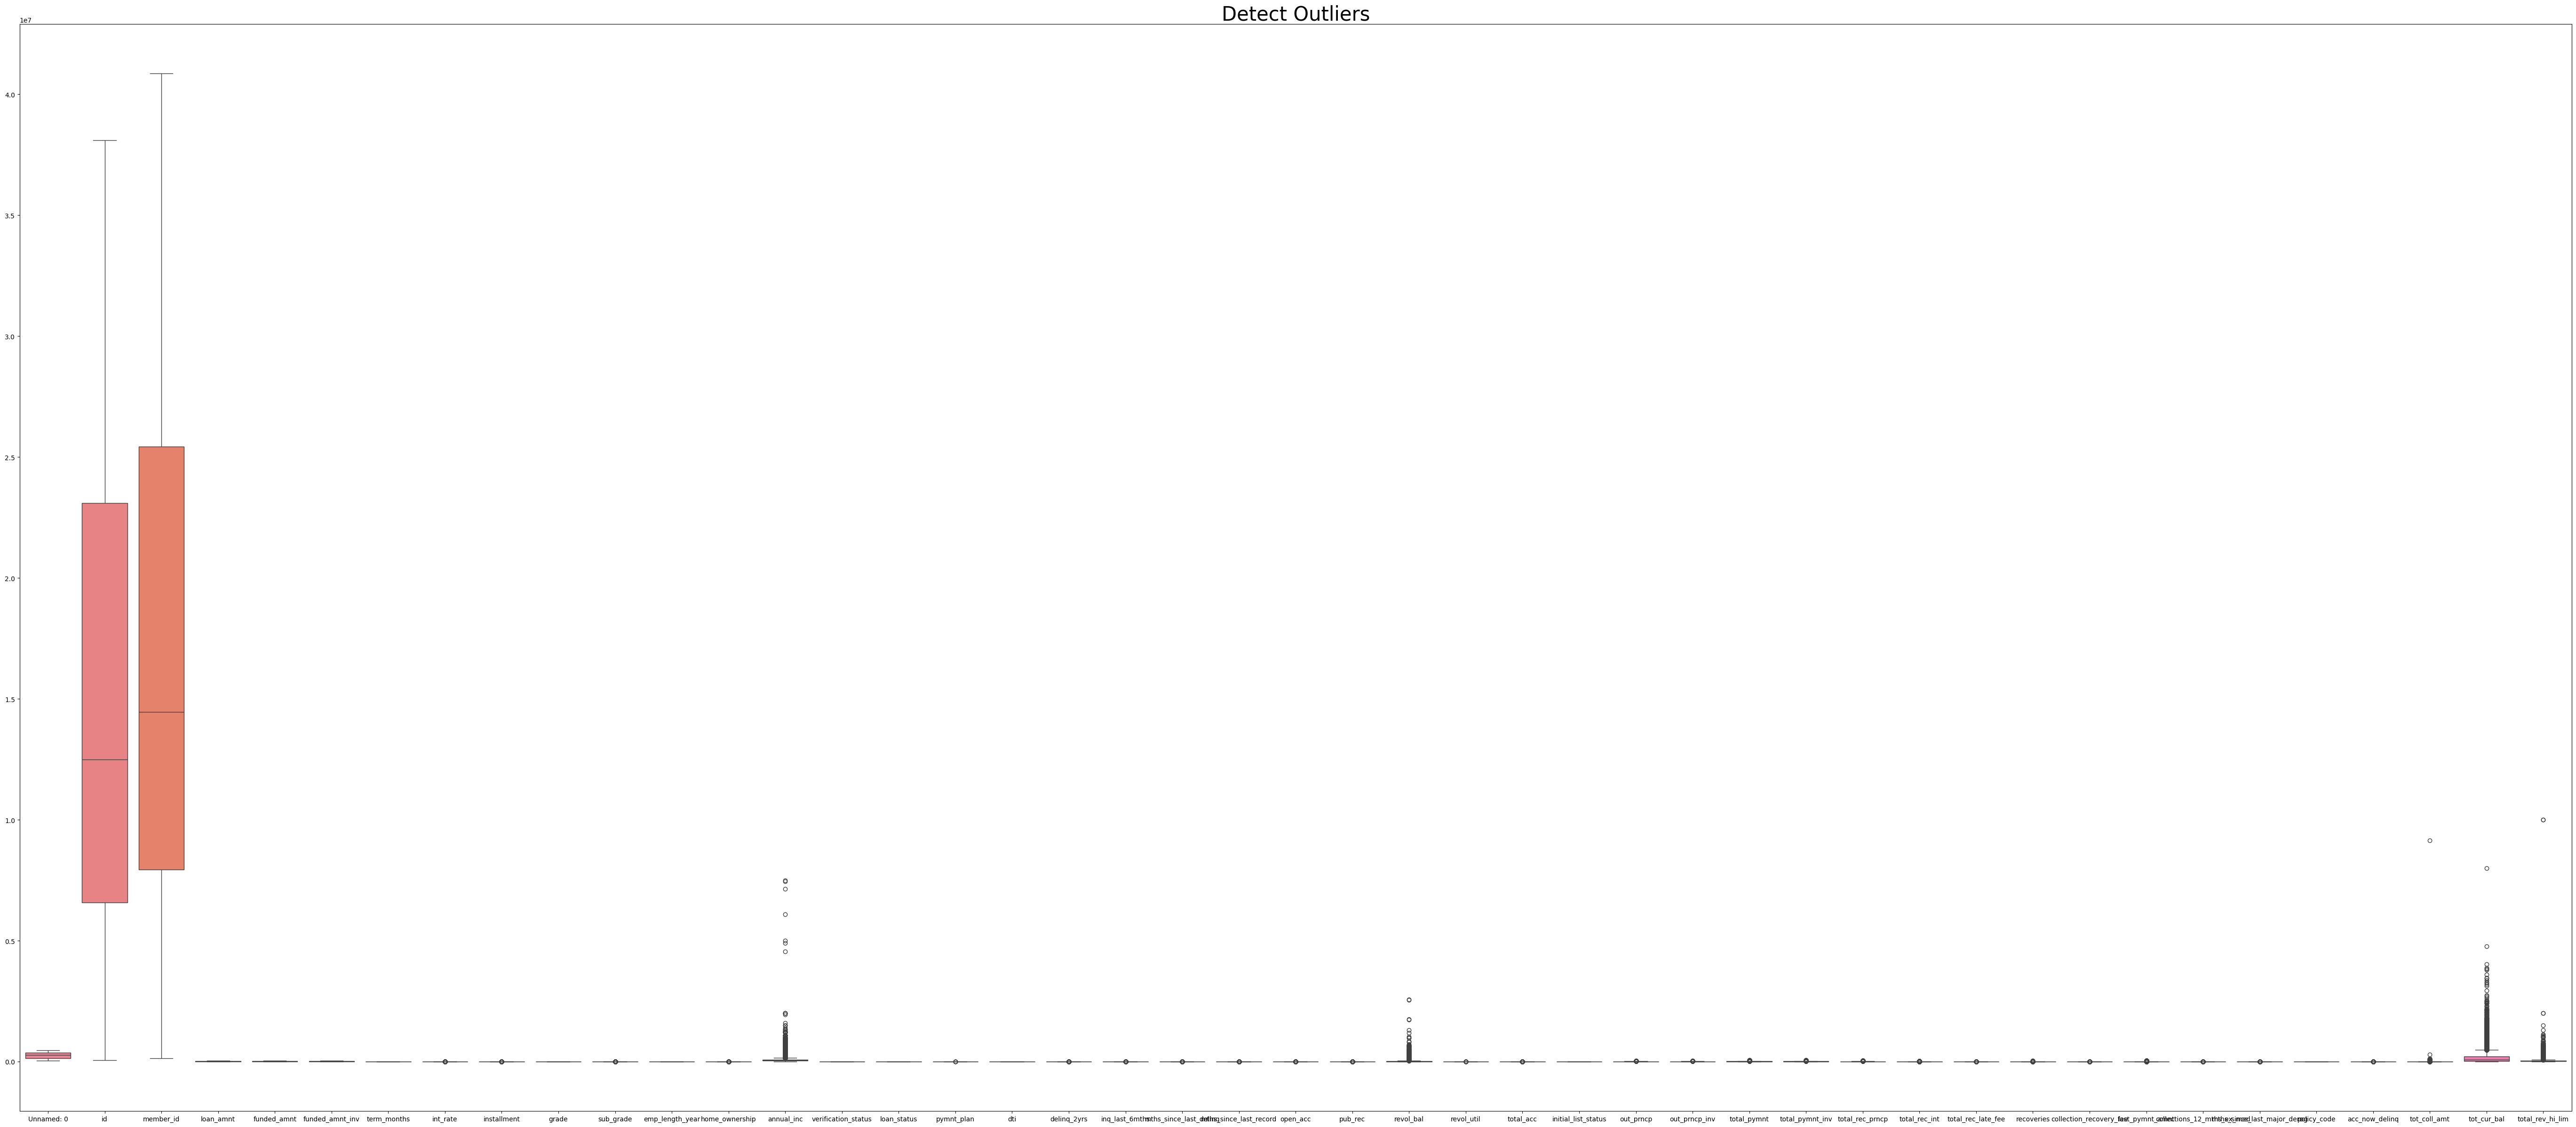

In [178]:
# melihat outliers
fig, ax = plt.subplots(figsize=(70,30))
plt.title('Detect Outliers', fontsize=30)
sns.boxplot(data = df_dummie)

Outliers ditemukan pada **'tot_coll_amt', 'total_rev_hi_lim'**

In [179]:
# Remove Outliers with Z-Score
columns = ['tot_coll_amt', 'total_rev_hi_lim']

for i in columns:
    upper_limit = df_dummie[i].mean() + 3*df_dummie[i].std()
    lower_limit = df_dummie[i].mean() - 3*df_dummie[i].std()

    df_dummie[i] = np.where(
        df_dummie[i]>upper_limit,
        upper_limit,
        np.where(
            df_dummie[i]<lower_limit,
            lower_limit,
            df_dummie[i]
        )
    )

<Axes: title={'center': 'Outliers Removed'}>

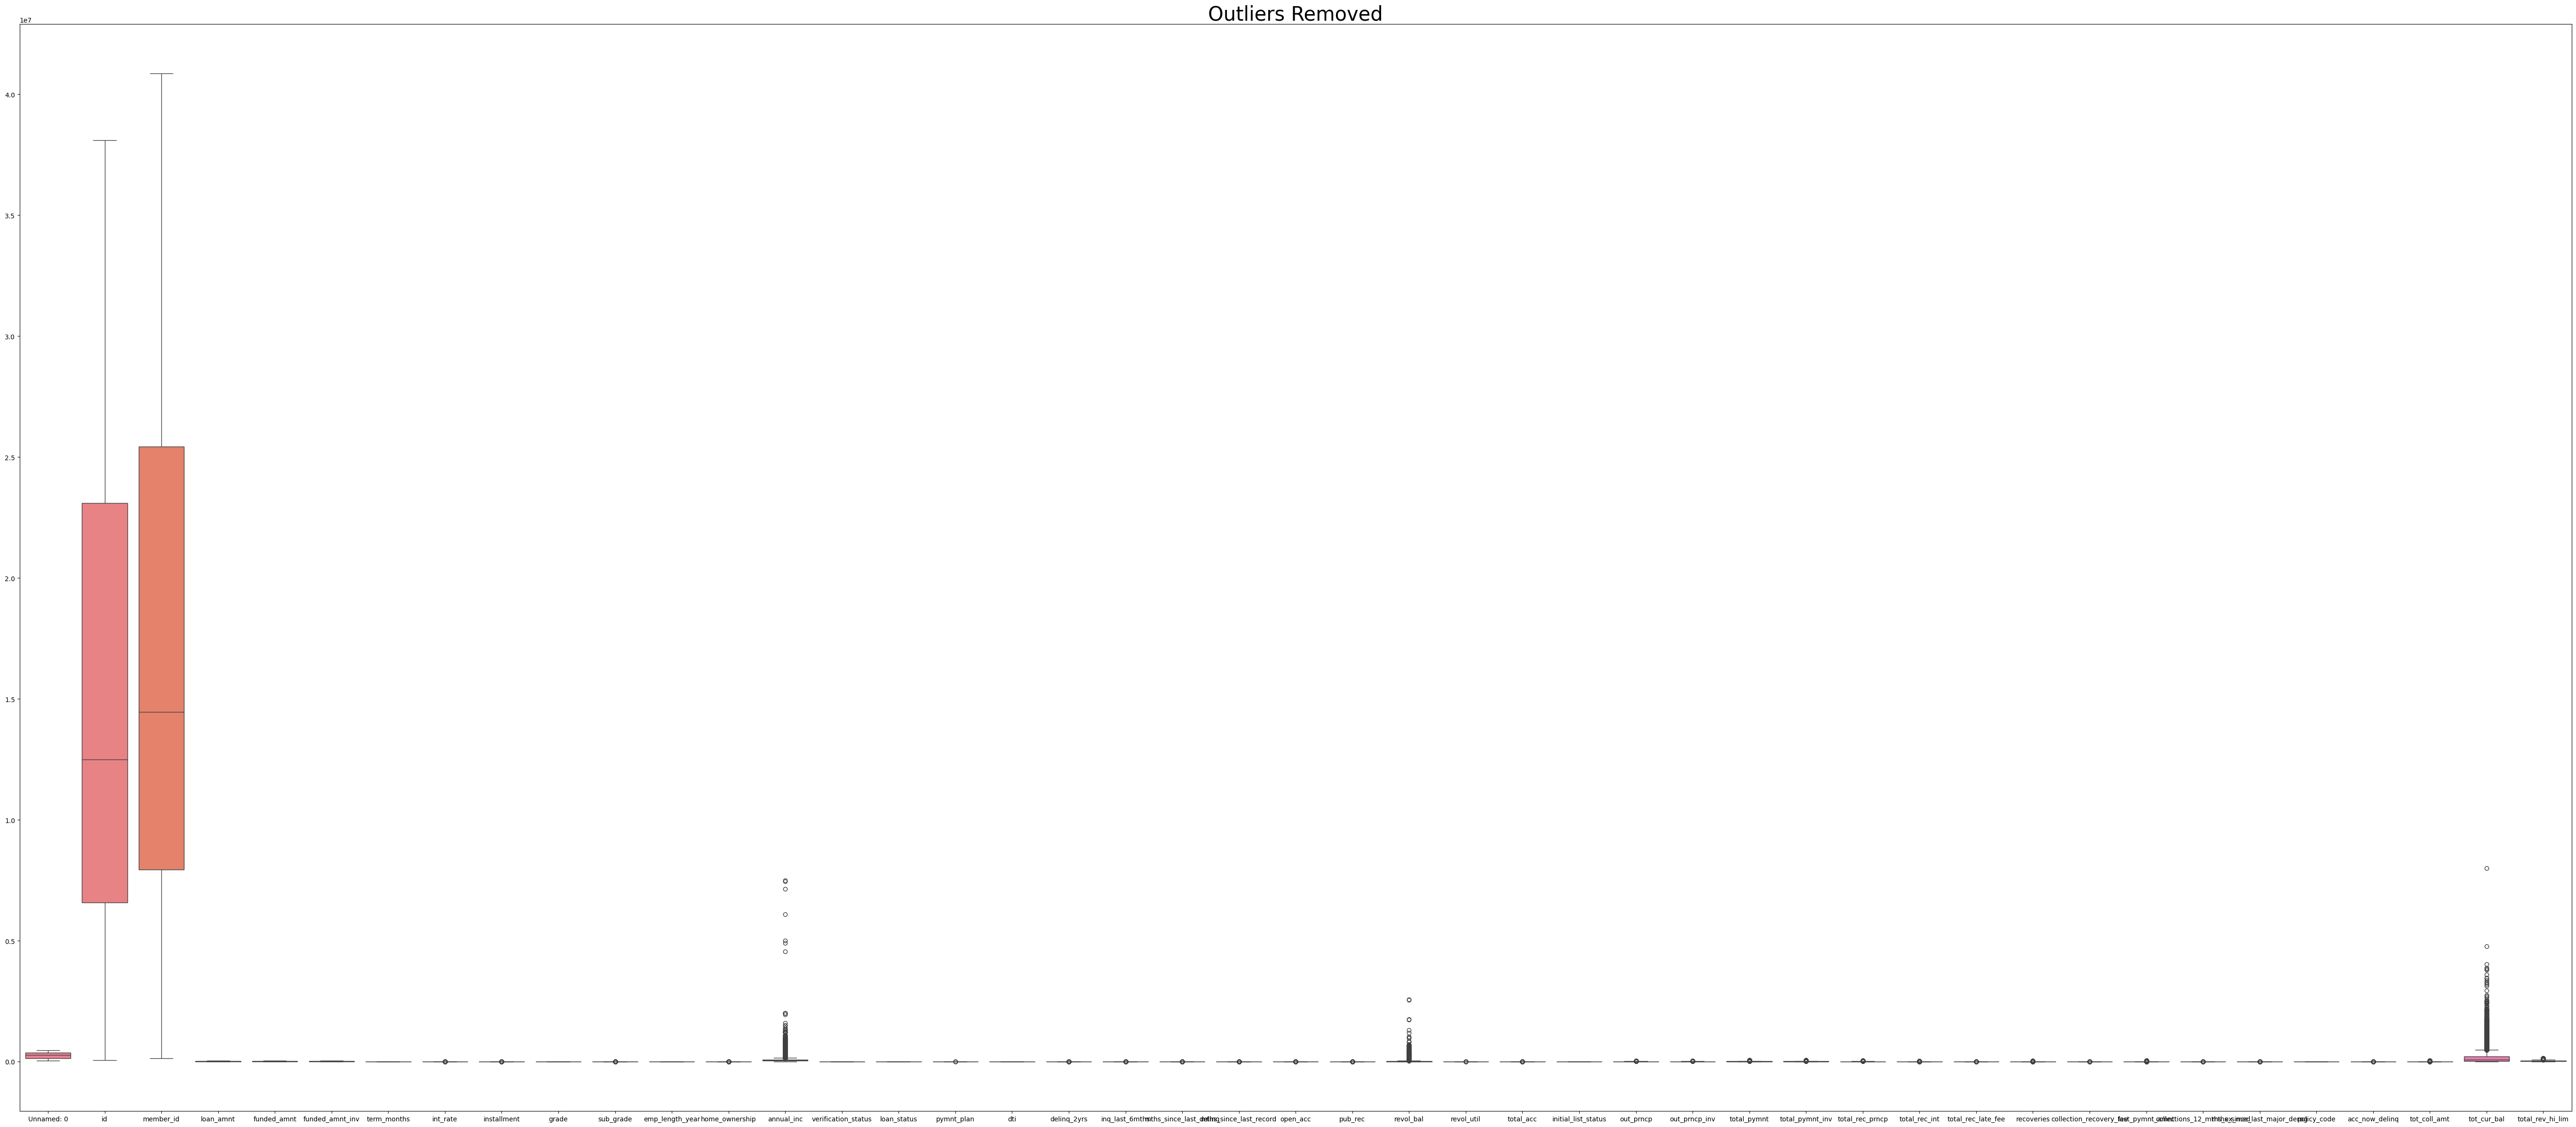

In [180]:
fig, ax = plt.subplots(figsize=(70,30))
plt.title('Outliers Removed', fontsize=30)
sns.boxplot(data = df_train)

In [181]:
df_dummie.shape

(396009, 58)

### Exploratory Data Analysis (EDA)

In [182]:
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,financial advisor,4.0,1,110000.0,1,Jan-14,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,chief of interpretation (park ranger),10.0,1,78000.0,2,Jan-14,2,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,0.0,116.0,18.0,1.0,18238,46.3,30.0,1,0.00,0.00,4677.920000,4677.92,1837.0

In [183]:
# fungsi visualisasi pie chart
fig_pie = plt.figure(figsize=(12, 5))

def vis_cat(cat_column, title_count, xy_label):
  ax = fig_pie.add_axes([0,0,1.5,1])
  df_train[cat_column].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, figsize=(12, 5))
  plt.xlabel(xy_label)
  plt.ylabel('')

  plt.savefig('fig.png', bbox_inches='tight')

<Figure size 1200x500 with 0 Axes>

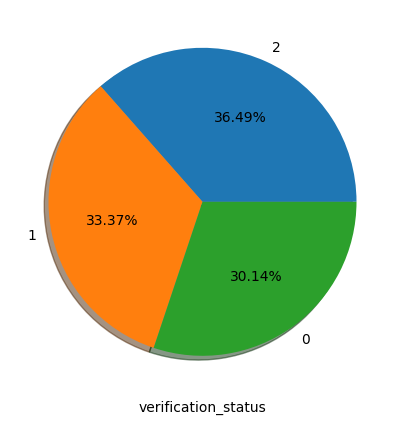

In [184]:
# pesebaran data berdasarkan area_code
col = 'verification_status'
title_c = 'Distribution of verification_status'
label = 'verification_status'

vis_cat(col, title_c, label)

In [185]:
df_dummie.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0


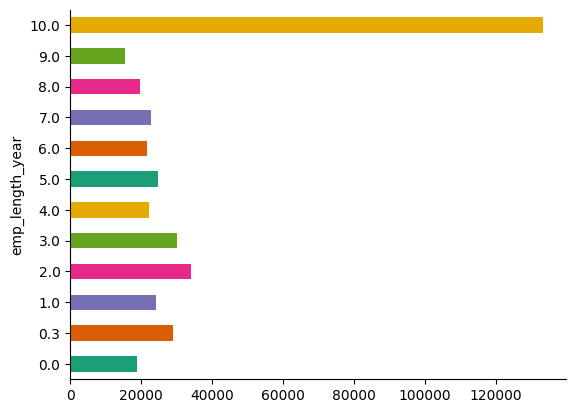

In [186]:
from matplotlib import pyplot as plt
import seaborn as sns
df_dummie.groupby('emp_length_year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

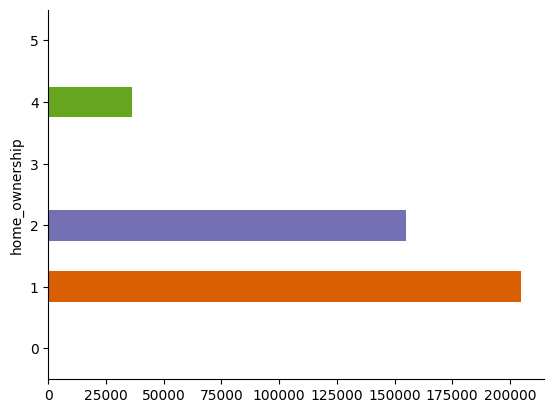

In [187]:
from matplotlib import pyplot as plt
import seaborn as sns
df_dummie.groupby('home_ownership').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

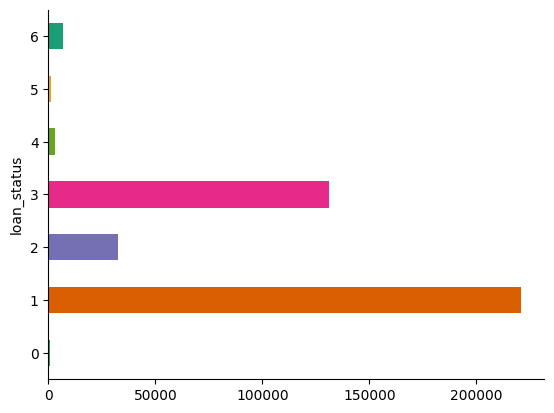

In [188]:
from matplotlib import pyplot as plt
import seaborn as sns
df_dummie.groupby('loan_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

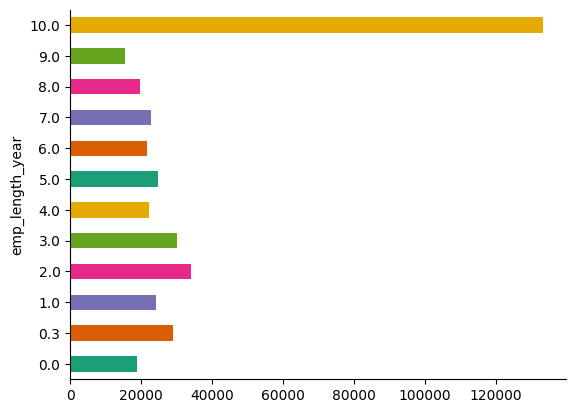

In [189]:
from matplotlib import pyplot as plt
import seaborn as sns
df_dummie.groupby('emp_length_year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [190]:
df_dummie.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length_year,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,396009.000000,3.960090e+05,3.960090e+05,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,3.960090e+05,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,3.960090e+05,396009.000000,396009.000000,396009.000000,396009.00000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.000000,396009.0,396009.000000,396009.000000,3.960090e+05,396009.000000
mean,257045.563714,1.523981e+07,1.699274e+07,14740.246371,14740.207988,14733.692949,42.796209,14.051501,445.241061,1.853324,21.508345,5.865860,1.666545,7.405779e+04,1.063549,1.862710,0.000013,17.728739,0.775099,16.314864,11.009803,11.441654,0.180627,1.656712e+04,56.855482,25.527746,0.587686,5146.61731,5144.866946,11317.407102,11311.870702,8626.799808,2609.705900,0.541100,80.360298,8.419869,3167.226718,0.010694,10.710080,1.0,0.004702,164.487320,1.388017e+05,29665.361457
std,126100.299660,1.042840e+07,1.107274e+07,8305.235885,8305.191217,8301.897117,10.812995,4.378394,243.770870,1.304160,12.899933,3.732117,0.879445,5.462813e+04,0.813791,1.099787,0.003553,7.877758,1.036240,22.660139,28.734362,5.027073,0.543900,2.094126e+04,22.988069,11.588335,0.492252,6604.65703,6602.744129,8047.317626,8042.997888,6957.115085,2414.361531,4.843799,521.492019,73.651947,5680.849642,0.117804,21.483293,0.0,0.074386,1350.640991,1.521147e+05,24194.363294
min,42535.000000,5.716700e+04,1.372250e+05,1000.000000,1000.000000,950.000000,36.000000,6.000000,23.260000,0.000000,1.000000,0.000000,0.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000
25%,141537.000000,6.572377e+06,7.947246e+06,8325.000000,8325.000000,8325.000000,36.000000,10.990000,269.520000,1.000000,12.000000,2.000000,1.000000,4.500000e+04,0.000000,1.000000,0.000000,11.800000,0.000000,0.000000,0.000000,8.000000,0.000000,6.705000e+03,40.400000,17.000000,0.000000,0.00000,0.000000,5499.360000,5497.460000,3600.000000,1003.180000,0.000000,0.000000,0.000000,319.270000,0.000000,0.000000,1.0,0.000000,0.000000,2.861800e+04,13500.000000
50%,268280.000000,1.249701e+07,1.446870e+07,13000.000000,13000.000000,13000.000000,36.000000,13.980000,392.650000,2.000000,22.000000,6.000000,1.000000,6.400000e+04,1.000000,1.000000,0.000000,17.340000,0.000000,0.000000,0.000000,11.000000,0.000000,1.208100e+04,58.000000,24.000000,1.000000,2341.44000,2340.990000,9236.400000,9230.760000,6500.000000,1871.680000,0.000000,0.000000,0.000000,541.810000,0.000000,0.000000,1.0,0.000000,0.000000,8.153900e+04,22800.000000
75%,367282.000000,2.310350e+07,2.542618e+07,20000.000000,20000.000000,20000.000000,60.000000,16.990000,581.690000,3.000000,31.000000,10.000000,2.000000,9.000000e+04,2.000000,3.000000,0.000000,23.400000,1.000000,29.000000,0.000000,14.000000,0.000000,2.074800e+04,74.700000,32.000000,1.000000,8674.73000,8670.290000,14956.370000,14948.160000,11562.240000,3345.610000,0.000000,0.000000,0.000000,3058.840000,0.000000,0.000000,1.0,0.000000,0.000000,2.089530e+05,37900.000000
max,466284.000000,3.80981

# Adding new label

criteria:

int_rate <10 maka score 5

.>=10 & <=15 maka score 4

.>15 & <=20 maka score 3

.>20 & <=25 maka score 2

.>25 maka score 1

In [191]:
# Define the function to categorize int_rate
def int_score(int_rate):
    if int_rate < 10:
        return 5
    elif int_rate >= 10 and int_rate <= 15:
        return 4
    elif int_rate > 15 and int_rate <= 20:
        return 3
    elif int_rate >20 and int_rate <= 25:
        return 2
    else:
        return 1

# Apply the function to the Age column using the apply() function
df_dummie['int_score'] = df_dummie['int_rate'].apply(int_score)
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0,4
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0,4
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0,5
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,4
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,financial advisor,4.0,1,110000.0,1,Jan-14,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,4
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,chief of interpretation (park ranger),10.0,1,78000.0,2,Jan-14,2,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,0.0,116.0,18.0,1.0,18238,46.3,30.0,1,0.00,0.00,

In [192]:
df_dummie['int_rate'].unique()

array([10.99, 13.98,  6.62, 13.53,  8.9 , 11.99, 12.85, 16.24,  9.67,
        7.62, 19.97, 14.98, 22.9 , 14.47, 19.22, 20.5 , 15.61, 18.25,
       21.48,  6.03,  7.9 , 17.57, 22.4 , 23.4 , 16.99, 23.7 , 25.89,
       25.8 , 24.08, 24.99, 25.57, 26.06, 25.99, 24.5 , 25.83,  6.  ,
       16.2 , 21.7 , 13.67, 17.76, 15.1 , 14.3 , 18.55, 19.52, 19.2 ,
       20.2 , 12.99, 17.1 , 21.  , 23.1 ,  9.99,  6.97,  8.6 ,  9.25,
       11.55, 13.68, 15.22, 15.88, 22.7 ,  9.71, 21.6 , 22.2 , 18.85,
       14.33, 17.56, 16.78, 13.05, 24.89, 23.5 , 21.15, 12.35, 20.8 ,
       10.64, 20.31, 25.28, 19.05, 15.31, 23.28, 11.14, 10.16, 17.27,
       13.11, 14.09, 18.75, 17.77, 12.12, 15.8 , 19.72, 16.29, 23.76,
       18.49, 20.49, 24.7 , 21.98, 23.83, 23.63, 22.47, 22.95, 21.49,
       24.83, 12.39,  6.99, 13.66, 17.14, 15.59, 11.44, 21.99, 14.31,
       17.86, 10.49, 15.99, 14.99, 19.99,  9.49, 20.99, 16.49,  7.49,
        8.19, 22.99,  8.67, 18.54, 19.24,  6.49, 23.99, 13.35, 10.15,
       18.24,  8.39,

'loan_status = 'Default': 0, 'Current': 1, 'Charged Off': 2, 'Fully Paid': 3, 'In Grace Period': 4, 'Late (16-30 days)': 5, 'Late (31-120 days)': 6


loan_status = 'Fully Paid' maka score 5

  'Current' & 'In Grace Period' maka score 4


  'Late (16-30 days)' & 'Late (31-120 days)' maka score 3

  'Default' maka score 1

  'Charged Off' maka score 2

In [193]:
# Define the function to categorize loan_status
def loan_score(loan_status):
    if loan_status ==3:
        return 5
    elif loan_status == 1 or loan_status ==4:
        return 4
    elif loan_status ==5 or loan_status ==6:
        return 3
    elif loan_status ==2:
        return 2
    else:
        return 1

# Apply the function to the Age column using the apply() function
df_dummie['loan_score'] = df_dummie['loan_status'].apply(loan_score)
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0,4,4
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0,4,4
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0,5,4
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,4,5
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,financial advisor,4.0,1,110000.0,1,Jan-14,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,4,4
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,chief of interpretation (park ranger),10.0,1,78000.0,2,Jan-14,2,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,0.0,116.0,18.0,1.0,1

In [194]:
df_dummie['loan_score'].unique()

array([4, 5, 3, 2, 1])

'delinq_2yrs' = 0 maka score 5
  
  .>= 1 & <=3 maka score 4

  .>=4 & <=6 maka score 3
  
  .>=7 & <=9 maka score 2
  
  .>=10 maka score 1

'pub_rec' = 0 maka score 5
  
  .>= 1 & <=3 maka score 4

  .>=4 & <=6 maka score 3
  
  .>=7 & <=9 maka score 2
  
  .>=10 maka score 1

In [195]:
# Define the function to categorize pub_rec
def record_score(pub_rec):
    if pub_rec <1:
        return 0
    elif pub_rec >= 1 and pub_rec <=3:
        return 1
    elif pub_rec >=4 and pub_rec <=6:
        return 2
    elif pub_rec >=7 and pub_rec <=9:
        return 3
    else:
        return 4

# Apply the function to the Age column using the apply() function
df_dummie['record_score'] = df_dummie['pub_rec'].apply(record_score)
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score,record_score
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0,4,4,0
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0,4,4,0
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0,5,4,0
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,4,5,1
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,financial advisor,4.0,1,110000.0,1,Jan-14,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,4,4,0
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,chief of interpretation (park ranger),10.0,1,78000.0,2,Jan-14,2,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Ju

In [196]:
# Define the function to categorize delinq_2yrs
def delinq_score(delinq_2yrs):
    if delinq_2yrs <1:
        return 0
    elif delinq_2yrs >= 1 and delinq_2yrs <=3:
        return 1
    elif delinq_2yrs >=4 and delinq_2yrs <=6:
        return 2
    elif delinq_2yrs >=7 and delinq_2yrs <=9:
        return 3
    else:
        return 4

# Apply the function to the Age column using the apply() function
df_dummie['delinq_score'] = df_dummie['delinq_2yrs'].apply(delinq_score)
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score,record_score,delinq_score
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0,4,4,0,0
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0,4,4,0,0
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0,5,4,0,0
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,4,5,1,0
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,financial advisor,4.0,1,110000.0,1,Jan-14,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,4,4,0,0
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,chief of interpretation (park ranger),10.0,1,78000.0,2,Jan-14,2,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consol

In [197]:
df_dummie['delinq_score'].unique()

array([0, 1, 2, 3, 4])

In [198]:
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score,record_score,delinq_score
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0,4,4,0,0
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0,4,4,0,0
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0,5,4,0,0
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,4,5,1,0
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,financial advisor,4.0,1,110000.0,1,Jan-14,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,4,4,0,0
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,chief of interpretation (park ranger),10.0,1,78000.0,2,Jan-14,2,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consol

In [199]:
df_dummie['delinq_score'].unique()

array([0, 1, 2, 3, 4])

In [200]:
df_dummie[['id','loan_score','int_score', 'delinq_score','record_score']]

,id,loan_score,int_score,delinq_score,record_score
42535,10149342,4,4,0,0
42536,10159584,4,4,0,0
42537,10159498,4,5,0,0
42538,10139658,5,4,0,1
42539,10159548,4,5,0,0
...,...,...,...,...,...
466280,8598660,4,4,0,0
466281,9684700,2,3,0,1
466282,9584776,4,3,0,0
466283,9604874,5,5,1,0


In [201]:
# Define the function to categorize delinq_2yrs
def risk_score(loan_score,int_score, delinq_score,record_score):
    if loan_score+int_score-delinq_score-record_score>=8:
        return 'excellent'
    elif loan_score+int_score-delinq_score-record_score>=6:
        return 'good'
    elif loan_score+int_score-delinq_score-record_score>=4:
        return 'low risk'
    else:
        return 'high risk'

# Apply the function to the Age column using the apply() function
df_dummie['risk_score'] = df_dummie.apply(lambda x: risk_score(x.loan_score,x.int_score,x.delinq_score,x.record_score), axis=1)
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score,record_score,delinq_score,risk_score
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,team leadern customer ops & systems,10.0,4,55000.0,2,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Feb-16,Dec-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0,4,4,0,0,excellent
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,medical assistant,1.0,2,26000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0,4,4,0,0,excellent
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,manager information delivery,10.0,1,105000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0,5,4,0,0,excellent
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,on road manager,10.0,2,40000.0,1,Dec-13,3,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Paid,Jan-16,0.0,53.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,4,5,1,0,excellent
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,aircraft maintenance engineer,2.0,1,63000.0,0,Dec-13,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,5,4,0,0,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,financial advisor,4.0,1,110000.0,1,Jan-14,1,0,https://www.lendingclub.com/browse/loanDetail....,no description,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,4,4,0,0,excellent
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,chief of interpretation (park ranger),10.0,1,78000.0,2,Jan-14,2,0,https://www.lendingc

In [202]:
df_dummie[['id','loan_score','int_score', 'delinq_score','record_score','risk_score']]

,id,loan_score,int_score,delinq_score,record_score,risk_score
42535,10149342,4,4,0,0,excellent
42536,10159584,4,4,0,0,excellent
42537,10159498,4,5,0,0,excellent
42538,10139658,5,4,0,1,excellent
42539,10159548,4,5,0,0,excellent
...,...,...,...,...,...,...
466280,8598660,4,4,0,0,excellent
466281,9684700,2,3,0,1,low risk
466282,9584776,4,3,0,0,good
466283,9604874,5,5,1,0,excellent


In [203]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preprocess the data
X = df_dummie[['loan_score','int_score', 'delinq_score','record_score']]
y = df_dummie['risk_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


### Data Encoding

In [204]:
for col in df_train.columns:
  print(col)
  print(df_train[col].unique())
  print('type data:', df_train[col].dtype)
  print('\n')

Unnamed: 0
[ 42535  42536  42537 ... 466282 466283 466284]
type data: int64


id
[10149342 10159584 10159498 ...  9584776  9604874  9199665]
type data: int64


member_id
[12000897 12011200  1319523 ... 11436914 11457002 11061576]
type data: int64


loan_amnt
[27050  9750 12000 ... 27775 33175 31725]
type data: int64


funded_amnt
[27050  9750 12000 ... 27775 33175 31725]
type data: int64


funded_amnt_inv
[27050.  9750. 12000. ... 33125. 33625. 34525.]
type data: float64


term_months
[36 60]
type data: int64


int_rate
[10.99 13.98  6.62 13.53  8.9  11.99 12.85 16.24  9.67  7.62 19.97 14.98
 22.9  14.47 19.22 20.5  15.61 18.25 21.48  6.03  7.9  17.57 22.4  23.4
 16.99 23.7  25.89 25.8  24.08 24.99 25.57 26.06 25.99 24.5  25.83  6.
 16.2  21.7  13.67 17.76 15.1  14.3  18.55 19.52 19.2  20.2  12.99 17.1
 21.   23.1   9.99  6.97  8.6   9.25 11.55 13.68 15.22 15.88 22.7   9.71
 21.6  22.2  18.85 14.33 17.56 16.78 13.05 24.89 23.5  21.15 12.35 20.8
 10.64 20.31 25.28 19.05 15.31 23.28 11.1

In [205]:
# melakukan label encoder (ordinal)
le = LabelEncoder()
df_dummie['emp_title'] = le.fit_transform(df_dummie['emp_title'])
df_dummie['application_type'] = le.fit_transform(df_dummie['application_type'])
df_dummie['addr_state'] = le.fit_transform(df_dummie['addr_state'])
df_dummie['title'] = le.fit_transform(df_dummie['title'])
df_dummie['purpose'] = le.fit_transform(df_dummie['purpose'])

In [206]:
df_dummie['risk_score'] = df_dummie['risk_score'].replace({'excellent': 3, 'good': 2, 'low risk': 1, 'high risk':0})

In [207]:
df_dummie=df_dummie._get_numeric_data()

In [208]:
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score,record_score,delinq_score,risk_score
42535,42535,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,12,131198,10.0,4,55000.0,2,1,0,2,9400,22,22.87,0.0,0.0,0.0,14.0,0.0,36638,61.2,27.0,0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,0.0,1,0,0.0,0.0,114834.0,59900.0,4,4,0,0,3
42536,42536,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,21,81777,1.0,2,26000.0,0,1,0,2,9280,4,25.12,0.0,0.0,0.0,12.0,0.0,7967,52.8,28.0,1,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,0.0,1,0,0.0,0.0,14123.0,15100.0,4,4,0,0,3
42537,42537,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,2,78109,10.0,1,105000.0,0,1,0,2,28675,6,14.05,1.0,43.0,0.0,12.0,0.0,13168,21.6,22.0,0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,0.0,1,0,0.0,0.0,267646.0,61100.0,5,4,0,0,3
42538,42538,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,15,91748,10.0,2,40000.0,1,3,0,2,10676,31,16.94,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,53.0,1,0,0.0,15386.0,13605.0,8100.0,4,5,1,0,3
42539,42539,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,5,4571,2.0,1,63000.0,0,1,0,2,22919,9,16.51,0.0,34.0,0.0,8.0,0.0,11431,74.2,29.0,0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,34.0,1,0,0.0,1514.0,272492.0,15400.0,5,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,2,22,49868,4.0,1,110000.0,1,1,0,2,10676,42,19.85,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,432.64,0.0,0.0,1,0,0.0,0.0,294998.0,29900.0,4,4,0,0,3
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,3,35,23622,10.0,1,78000.0,2,2,0,2,10676,41,18.45,5.0,0.0,116.0,18.0,1.0,18238,46.3,30.0,1,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,17.50,0.0,0.0,1,0,0.0,0.0,221830.0,39400.0,3,2,1,0,1
466282,466282,9584776,11436914,20700,20700,20700.0,60,16.99,514.34,3,31,95673,7.0,1,46000.0,2,1,0,2,10676,34,25.65,2.0,65.0,0.0,18.0,0.0,6688,51.1,43.0,1,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,514.34,0.0,0.0,1,0,0.0,0.0,73598.0,13100.0,3,4,0,0,2
466283,466283,9604874,11457002,2000,2000,2000.0,36,7.90,62.59,0,4,117648,3.0,4,83000.0,2,3,0,1,8165,4,5.39,1.0,13.0,0.0,21.0,0.0,11404,21.5,27.0,0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,1500.68,0.0,0.0,1,0,0.0,0.0,591610.0,53100.0,5,5,0,1,3


### Handling Imbalance Data (Variabel Target)

In [209]:
# memisahkan variable input dan target
X = df_dummie.drop(['risk_score'], axis=1)
y = df_dummie['risk_score']

In [210]:
y.value_counts()

risk_score
3    215797
2    141935
1     34545
0      3732
Name: count, dtype: int64

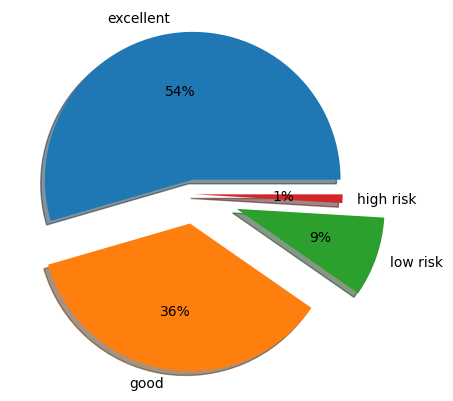

risk_score
3    215797
2    141935
1     34545
0      3732
Name: count, dtype: int64


In [211]:
risk_count = df_dummie['risk_score'].value_counts()
labels = ['excellent','good','low risk','high risk']
risk = y.value_counts()
myexplode = [0.1, 0.2, 0.3,0]
plt.pie(risk, labels = labels, explode = myexplode, shadow = True, autopct='%.0f%%')
plt.show()
print(y.value_counts())

Dilihat dari pie chart bahwa terjadi ketidakseimbangan variable target atau 'risk_Score' sehingga diperlukan balancing

In [212]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler()
# Resample X and y so there are equal numbers of each y
X, y = resampler.fit_resample(X, y)

y.value_counts()

risk_score
0    3732
1    3732
2    3732
3    3732
Name: count, dtype: int64

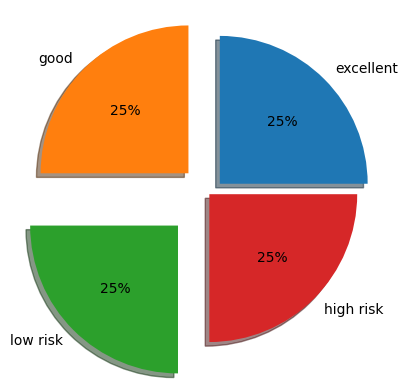

risk_score
0    3732
1    3732
2    3732
3    3732
Name: count, dtype: int64


In [213]:
Y_count = df_dummie['risk_score'].value_counts()
labels = ['excellent','good','low risk','high risk']
Y = y.value_counts()
myexplode = [0.1, 0.2, 0.3,0]
plt.pie(Y, labels = labels, explode = myexplode, shadow = True, autopct='%.0f%%')
plt.show()
print(y.value_counts())

In [214]:
# menggabungkan data X dan y kembali
df_dummie = pd.concat([X, y], axis=1)
df_dummie

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score,record_score,delinq_score,risk_score
0,42619,10159404,12011040,28000,28000,28000.0,60,23.40,795.79,4,45,3324,10.0,2,124000.0,1,2,0,2,6335,33,8.58,2.0,37.0,47.0,19.0,3.0,27597,69.9,40.0,0,0.00,0.00,12732.64000,12732.64,4631.49,8101.15,0.0,0.0,0.0,795.79,0.0,0.0,1,0,0.0,0.0,181757.0,39500.0,2,2,1,0,0
1,42655,10079427,11931054,19425,19425,19425.0,60,25.89,580.33,6,63,106922,5.0,2,55000.0,1,2,0,2,20098,37,19.69,1.0,71.0,0.0,14.0,0.0,11365,57.4,26.0,0,0.00,0.00,9865.61000,9865.61,3269.22,6596.39,0.0,0.0,0.0,580.33,0.0,71.0,1,0,0.0,80.0,38879.0,19800.0,1,2,0,0,0
2,42780,10158629,12010312,35000,35000,35000.0,60,24.08,1008.51,5,52,18973,10.0,1,120000.0,2,2,0,2,32382,4,6.67,1.0,10.0,116.0,11.0,1.0,17751,66.2,26.0,1,0.00,0.00,18152.86000,18152.86,6559.72,11593.14,0.0,0.0,0.0,1008.51,0.0,0.0,1,0,0.0,0.0,305872.0,26800.0,2,2,1,1,0
3,43194,10158530,12010226,15000,15000,15000.0,60,15.61,361.67,2,24,136650,10.0,1,50000.0,1,2,0,1,36969,33,15.05,2.0,17.0,111.0,10.0,1.0,9871,64.1,22.0,1,0.00,0.00,6871.61000,6871.61,3563.55,3308.06,0.0,0.0,0.0,361.67,0.0,0.0,1,0,0.0,925.0,36095.0,15400.0,3,2,1,1,0
4,43214,10078349,10137051,24000,24000,24000.0,60,22.90,675.20,4,44,130866,10.0,1,70000.0,1,2,0,2,10676,19,18.84,1.0,12.0,0.0,10.0,0.0,29543,92.9,34.0,0,0.00,0.00,12828.80000,12828.80,4918.43,7910.37,0.0,0.0,0.0,675.20,0.0,0.0,1,0,0.0,0.0,297975.0,31800.0,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14923,413571,13597345,15649699,15600,15600,15500.0,36,7.62,486.12,0,3,93518,10.0,2,75000.0,1,1,0,2,10676,4,6.98,0.0,0.0,115.0,4.0,1.0,8930,66.1,12.0,1,6934.23,6889.78,10208.52000,10143.08,8665.77,1542.75,0.0,0.0,0.0,486.12,0.0,0.0,1,0,0.0,0.0,9146.0,13500.0,5,4,1,0,3
14924,420030,12976647,15008843,17700,17700,17700.0,36,7.90,553.84,0,4,140231,10.0,1,110000.0,0,1,0,1,8165,22,19.44,1.0,0.0,0.0,24.0,0.0,46413,43.1,43.0,0,7885.83,7885.83,11630.64000,11630.64,9814.17,1816.47,0.0,0.0,0.0,553.84,0.0,0.0,1,0,0.0,0.0,131848.0,107800.0,5,4,0,0,3
14925,153497,3916073,5008404,20000,20000,20000.0,36,8.90,635.07,0,5,13352,7.0,1,115000.0,2,3,0,2,9400,22,3.99,1.0,0.0,0.0,9.0,0.0,24899,48.9,39.0,1,0.00,0.00,22093.87975,22093.88,20000.00,2093.88,0.0,0.0,0.0,11304.09,0.0,0.0,1,0,0.0,0.0,290971.0,50900.0,5,5,0,0,3
14926,457391,10598042,12530022,9350,9350,9350.0,36,12.85,314.37,1,14,60687,10.0,2,42000.0,1,1,0,1,8165,19,6.14,1.0,45.0,0.0,7.0,0.0,6499,81.2,19.0,0,3795.94,3795.94,7230.51000,7230.51,5554.06,1676.45,0.0,0.0,0.0,314.37,0.0,45.0,1,0,0.0,0.0,6499.0,8000.0,4,4,0,0,3


### Feature Selection

Untuk feature selection, digunakan teknik SelectKBest.

In [215]:
# memisahkan variable input dan target
X = df_dummie.drop(['risk_score'], axis=1)
y = df_dummie['risk_score']

In [216]:
bestfeatures = SelectKBest(score_func=chi2, k=6)

In [217]:
X

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_title,emp_length_year,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_score,loan_score,record_score,delinq_score
0,42619,10159404,12011040,28000,28000,28000.0,60,23.40,795.79,4,45,3324,10.0,2,124000.0,1,2,0,2,6335,33,8.58,2.0,37.0,47.0,19.0,3.0,27597,69.9,40.0,0,0.00,0.00,12732.64000,12732.64,4631.49,8101.15,0.0,0.0,0.0,795.79,0.0,0.0,1,0,0.0,0.0,181757.0,39500.0,2,2,1,0
1,42655,10079427,11931054,19425,19425,19425.0,60,25.89,580.33,6,63,106922,5.0,2,55000.0,1,2,0,2,20098,37,19.69,1.0,71.0,0.0,14.0,0.0,11365,57.4,26.0,0,0.00,0.00,9865.61000,9865.61,3269.22,6596.39,0.0,0.0,0.0,580.33,0.0,71.0,1,0,0.0,80.0,38879.0,19800.0,1,2,0,0
2,42780,10158629,12010312,35000,35000,35000.0,60,24.08,1008.51,5,52,18973,10.0,1,120000.0,2,2,0,2,32382,4,6.67,1.0,10.0,116.0,11.0,1.0,17751,66.2,26.0,1,0.00,0.00,18152.86000,18152.86,6559.72,11593.14,0.0,0.0,0.0,1008.51,0.0,0.0,1,0,0.0,0.0,305872.0,26800.0,2,2,1,1
3,43194,10158530,12010226,15000,15000,15000.0,60,15.61,361.67,2,24,136650,10.0,1,50000.0,1,2,0,1,36969,33,15.05,2.0,17.0,111.0,10.0,1.0,9871,64.1,22.0,1,0.00,0.00,6871.61000,6871.61,3563.55,3308.06,0.0,0.0,0.0,361.67,0.0,0.0,1,0,0.0,925.0,36095.0,15400.0,3,2,1,1
4,43214,10078349,10137051,24000,24000,24000.0,60,22.90,675.20,4,44,130866,10.0,1,70000.0,1,2,0,2,10676,19,18.84,1.0,12.0,0.0,10.0,0.0,29543,92.9,34.0,0,0.00,0.00,12828.80000,12828.80,4918.43,7910.37,0.0,0.0,0.0,675.20,0.0,0.0,1,0,0.0,0.0,297975.0,31800.0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14923,413571,13597345,15649699,15600,15600,15500.0,36,7.62,486.12,0,3,93518,10.0,2,75000.0,1,1,0,2,10676,4,6.98,0.0,0.0,115.0,4.0,1.0,8930,66.1,12.0,1,6934.23,6889.78,10208.52000,10143.08,8665.77,1542.75,0.0,0.0,0.0,486.12,0.0,0.0,1,0,0.0,0.0,9146.0,13500.0,5,4,1,0
14924,420030,12976647,15008843,17700,17700,17700.0,36,7.90,553.84,0,4,140231,10.0,1,110000.0,0,1,0,1,8165,22,19.44,1.0,0.0,0.0,24.0,0.0,46413,43.1,43.0,0,7885.83,7885.83,11630.64000,11630.64,9814.17,1816.47,0.0,0.0,0.0,553.84,0.0,0.0,1,0,0.0,0.0,131848.0,107800.0,5,4,0,0
14925,153497,3916073,5008404,20000,20000,20000.0,36,8.90,635.07,0,5,13352,7.0,1,115000.0,2,3,0,2,9400,22,3.99,1.0,0.0,0.0,9.0,0.0,24899,48.9,39.0,1,0.00,0.00,22093.87975,22093.88,20000.00,2093.88,0.0,0.0,0.0,11304.09,0.0,0.0,1,0,0.0,0.0,290971.0,50900.0,5,5,0,0
14926,457391,10598042,12530022,9350,9350,9350.0,36,12.85,314.37,1,14,60687,10.0,2,42000.0,1,1,0,1,8165,19,6.14,1.0,45.0,0.0,7.0,0.0,6499,81.2,19.0,0,3795.94,3795.94,7230.51000,7230.51,5554.06,1676.45,0.0,0.0,0.0,314.37,0.0,45.0,1,0,0.0,0.0,6499.0,8000.0,4,4,0,0


In [218]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features','Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by='Score',ascending=False)

The features that correlate well with target feature:



,Features,Score
2,member_id,7.022586e+08
1,id,6.779500e+08
35,total_rec_prncp,1.956451e+07
40,last_pymnt_amnt,1.606371e+07
48,total_rev_hi_lim,1.022037e+07
31,out_prncp,9.900794e+06
32,out_prncp_inv,9.900183e+06
47,tot_cur_bal,9.248412e+06
38,recoveries,7.244080e+06
33,total_pymnt,4.989536e+06


Melihat korelasi feature diatas terhadap target features, maka akan dipilih feature yang memiliki skor diatas 100. Feature yang dipilih itu digunakan untuk melihat sekali lagi korelasi feature dengan feature lainnya.

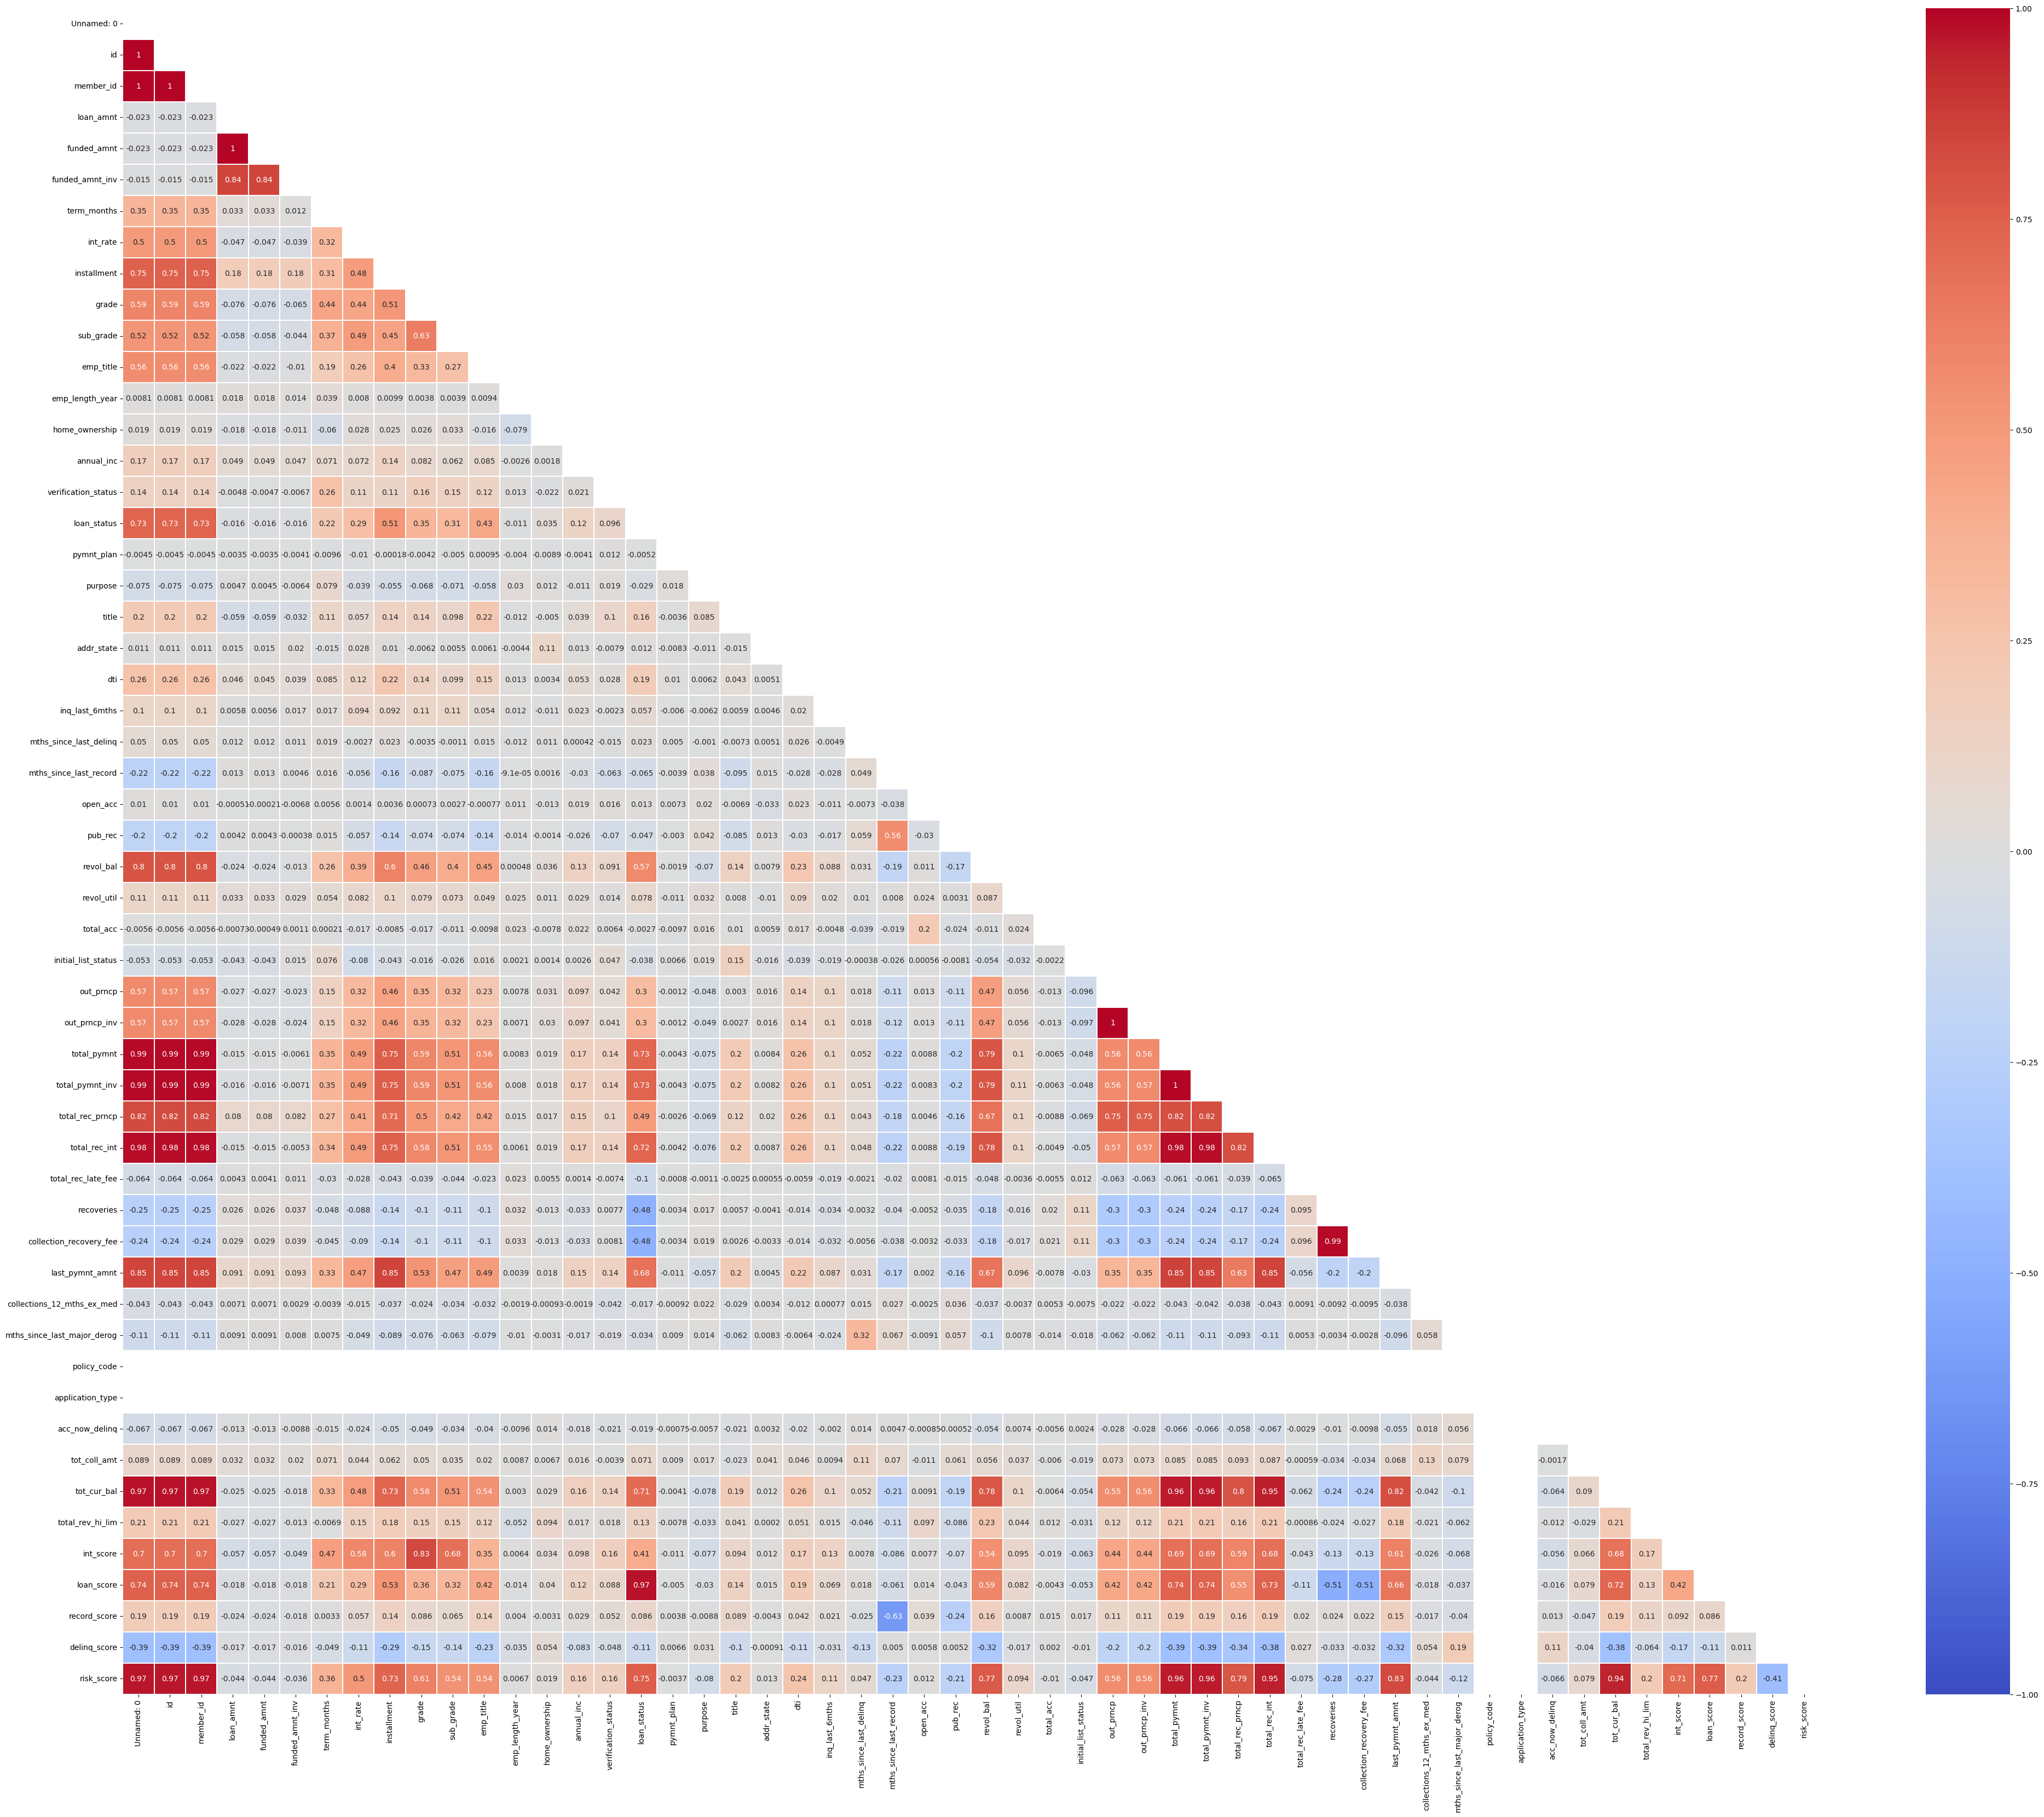

In [219]:
plt.figure(figsize=(50, 40))
corr = df_dummie.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [220]:
df_model = df_dummie[['installment', 'grade', 'sub_grade','int_rate',
                      'loan_status', 'revol_bal', 'out_prncp', 'out_prncp_inv',
                     'total_pymnt', 'total_pymnt_inv','total_rec_prncp','total_rec_int',
                      'last_pymnt_amnt','tot_cur_bal','int_score','loan_score','risk_score']]

### Correlation Matrix

In [221]:
df_model

,installment,grade,sub_grade,int_rate,loan_status,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,int_score,loan_score,risk_score
0,795.79,4,45,23.40,2,27597,0.00,0.00,12732.64000,12732.64,4631.49,8101.15,795.79,181757.0,2,2,0
1,580.33,6,63,25.89,2,11365,0.00,0.00,9865.61000,9865.61,3269.22,6596.39,580.33,38879.0,1,2,0
2,1008.51,5,52,24.08,2,17751,0.00,0.00,18152.86000,18152.86,6559.72,11593.14,1008.51,305872.0,2,2,0
3,361.67,2,24,15.61,2,9871,0.00,0.00,6871.61000,6871.61,3563.55,3308.06,361.67,36095.0,3,2,0
4,675.20,4,44,22.90,2,29543,0.00,0.00,12828.80000,12828.80,4918.43,7910.37,675.20,297975.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14923,486.12,0,3,7.62,1,8930,6934.23,6889.78,10208.52000,10143.08,8665.77,1542.75,486.12,9146.0,5,4,3
14924,553.84,0,4,7.90,1,46413,7885.83,7885.83,11630.64000,11630.64,9814.17,1816.47,553.84,131848.0,5,4,3
14925,635.07,0,5,8.90,3,24899,0.00,0.00,22093.87975,22093.88,20000.00,2093.88,11304.09,290971.0,5,5,3
14926,314.37,1,14,12.85,1,6499,3795.94,3795.94,7230.51000,7230.51,5554.06,1676.45,314.37,6499.0,4,4,3


In [222]:
df_model.corr()

,installment,grade,sub_grade,int_rate,loan_status,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,int_score,loan_score,risk_score
installment,1.000000,0.213462,0.218260,0.212090,0.015354,0.262408,0.328545,0.328515,0.679903,0.679963,0.466496,0.654562,0.188599,0.299247,-0.206861,-0.098216,-0.148272
grade,0.213462,1.000000,0.996184,0.970959,0.054490,-0.014460,0.046836,0.046874,-0.037345,-0.037189,-0.282798,0.390534,-0.097349,-0.050573,-0.938667,-0.410025,-0.714104
sub_grade,0.218260,0.996184,1.000000,0.982310,0.053850,-0.014480,0.047849,0.047886,-0.036339,-0.036185,-0.285037,0.396307,-0.098447,-0.051055,-0.948410,-0.415565,-0.721706
int_rate,0.212090,0.970959,0.982310,1.000000,0.066778,-0.017417,0.012561,0.012593,-0.014727,-0.014581,-0.266055,0.409567,-0.094975,-0.059490,-0.962866,-0.426962,-0.730683
loan_status,0.015354,0.054490,0.053850,0.066778,1.000000,-0.022450,-0.253978,-0.253957,0.138235,0.138244,0.184773,-0.052025,0.330864,-0.009451,-0.065986,0.064504,-0.013927
revol_bal,0.262408,-0.014460,-0.014480,-0.017417,-0.022450,1.000000,0.119540,0.119518,0.216518,0.216521,0.172845,0.173533,0.057540,0.454866,0.016810,0.017378,0.053008
out_prncp,0.328545,0.046836,0.047849,0.012561,-0.253978,0.119540,1.000000,0.999999,0.175144,0.175186,0.025783,0.502238,-0.195927,0.155998,-0.011444,0.213628,0.114551
out_prncp_inv,0.328515,0.046874,0.047886,0.012593,-0.253957,0.119518,0.999999,1.000000,0.175092,0.175135,0.025739,0.502199,-0.195932,0.155988,-0.011469,0.213622,0.114545
total_pymnt,0.679903,-0.037345,-0.036339,-0.014727,0.138235,0.216518,0.175144,0.175092,1.000000,0.999996,0.907674,0.652137,0.588095,0.249931,0.018168,0.371239,0.237386
total_pymnt_inv,0.679963,-0.037189,-0.036185,-0.014581,0.138244,0.216521,0.175186,0.175135,0.999996,1.000000,0.907655,0.652167,0.588131,0.249933,0.018024,0.371215,0.237299


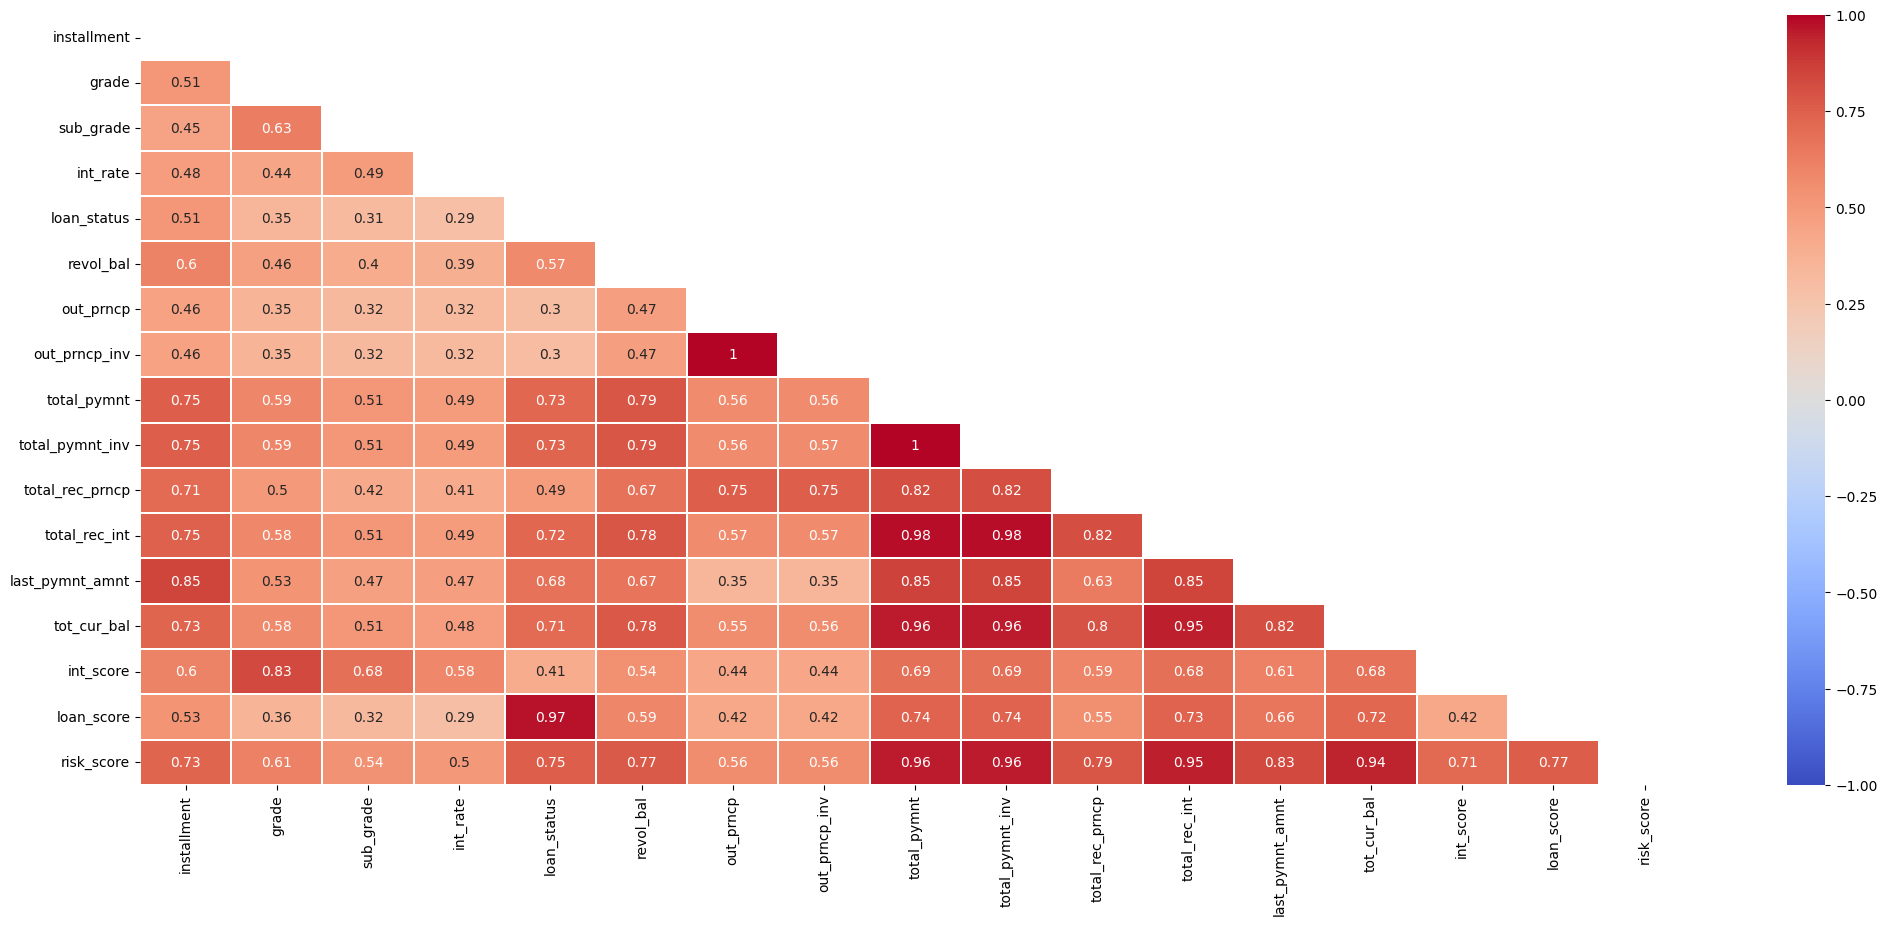

In [223]:
plt.figure(figsize=(25, 10))
corr = df_model.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Korelasi yang bernilai 1 (merah) menunjukkan hubungan linear positif sempurna, sedangkan yang bernilai -1 (biru) menunjukkan hubungan linear negatif sempurna.
Korelasiyang bernilai   (putih)0 menunjukkan tidak adanya hubungan linear antara variabel tersebut
Semakin mendekati 1 atau -1, semakin kuat hubungan linear antara variabel.

Berdasarkan heatmap diatas, akan dihapus feature yang mendekati nilai 0 yaitu 'int_rate', hal ini juga dikarenakan 'int_rate' sudah diwakilkan oleh 'int_score'. Feature yang tidak dihapus akan digunakan untuk feature dalam pemodelan machine learning.

In [224]:
df_model = df_model.drop(['int_rate'], axis=1)

In [225]:
df_model

,installment,grade,sub_grade,loan_status,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,int_score,loan_score,risk_score
0,795.79,4,45,2,27597,0.00,0.00,12732.64000,12732.64,4631.49,8101.15,795.79,181757.0,2,2,0
1,580.33,6,63,2,11365,0.00,0.00,9865.61000,9865.61,3269.22,6596.39,580.33,38879.0,1,2,0
2,1008.51,5,52,2,17751,0.00,0.00,18152.86000,18152.86,6559.72,11593.14,1008.51,305872.0,2,2,0
3,361.67,2,24,2,9871,0.00,0.00,6871.61000,6871.61,3563.55,3308.06,361.67,36095.0,3,2,0
4,675.20,4,44,2,29543,0.00,0.00,12828.80000,12828.80,4918.43,7910.37,675.20,297975.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14923,486.12,0,3,1,8930,6934.23,6889.78,10208.52000,10143.08,8665.77,1542.75,486.12,9146.0,5,4,3
14924,553.84,0,4,1,46413,7885.83,7885.83,11630.64000,11630.64,9814.17,1816.47,553.84,131848.0,5,4,3
14925,635.07,0,5,3,24899,0.00,0.00,22093.87975,22093.88,20000.00,2093.88,11304.09,290971.0,5,5,3
14926,314.37,1,14,1,6499,3795.94,3795.94,7230.51000,7230.51,5554.06,1676.45,314.37,6499.0,4,4,3


## Baseline Model

In [243]:
# memisahkan variable input dan target
X = df_model.drop(['risk_score'], axis=1)
y = df_model['risk_score']

In [244]:
# split train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [245]:
pip install catboost

In [246]:
# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [247]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
             LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
             RandomForestClassifier,
             GradientBoostingClassifier,
             ExtraTreesClassifier,
             XGBClassifier,
             CatBoostClassifier]

model_name = ['DecisionTreeClassifier',
              'LogisticRegression',
              'KNeighborsClassifier',
              'GaussianNB',
              'RandomForestClassifier',
              'GradientBoostingClassifier',
              'ExtraTreesClassifier',
              'XGBClassifier',
              'CatBoostClassifier']

## loop for all model
datatr = []
datasc = []
Recall =[]
Precision =[]
F1_Score = []

for idx, model_type in enumerate(all_model):
    #num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    F1_ScoreTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y):

        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred, pos_label='positive', average='micro'))
        PrecisionTemp.append(precision_score(y_test,y_pred, pos_label='positive',average='micro'))
        F1_ScoreTemp.append(f1_score(y_test, y_pred, pos_label='positive', average='micro'))

        nfold += 1

    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    F1_Score.append(np.mean(F1_ScoreTemp))

Streaming output truncated to the last 5000 lines.
4:	learn: 0.9525774	total: 85.2ms	remaining: 17s
5:	learn: 0.9041936	total: 101ms	remaining: 16.7s
6:	learn: 0.8654714	total: 117ms	remaining: 16.5s
7:	learn: 0.8305025	total: 132ms	remaining: 16.4s
8:	learn: 0.8024856	total: 148ms	remaining: 16.3s
9:	learn: 0.7750147	total: 164ms	remaining: 16.3s
10:	learn: 0.7512666	total: 180ms	remaining: 16.2s
11:	learn: 0.7304675	total: 198ms	remaining: 16.3s
12:	learn: 0.7120775	total: 215ms	remaining: 16.3s
13:	learn: 0.6950192	total: 231ms	remaining: 16.3s
14:	learn: 0.6796070	total: 247ms	remaining: 16.2s
15:	learn: 0.6664845	total: 264ms	remaining: 16.2s
16:	learn: 0.6545650	total: 285ms	remaining: 16.5s
17:	learn: 0.6447704	total: 300ms	remaining: 16.4s
18:	learn: 0.6343554	total: 320ms	remaining: 16.5s
19:	learn: 0.6246362	total: 336ms	remaining: 16.5s
20:	learn: 0.6169365	total: 352ms	remaining: 16.4s
21:	learn: 0.6106601	total: 369ms	remaining: 16.4s
22:	learn: 0.6039322	total: 386ms	rema

In [248]:
# compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['F1-Score'] = F1_Score
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test', ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,F1-Score,gap
5,GradientBoostingClassifier,0.795133,0.766747,0.766747,0.766747,0.766747,0.028386
8,CatBoostClassifier,0.883290,0.759379,0.759379,0.759379,0.759379,0.123911
4,RandomForestClassifier,1.000000,0.753015,0.753015,0.753015,0.753015,0.246985
7,XGBClassifier,0.949206,0.748996,0.748996,0.748996,0.748996,0.200211
6,ExtraTreesClassifier,1.000000,0.743637,0.743637,0.743637,0.743637,0.256363
0,DecisionTreeClassifier,1.000000,0.680735,0.680735,0.680735,0.680735,0.319265
1,LogisticRegression,0.613679,0.611804,0.611804,0.611804,0.611804,0.001875
3,GaussianNB,0.499849,0.499398,0.499398,0.499398,0.499398,0.000451
2,KNeighborsClassifier,0.645130,0.474744,0.474744,0.474744,0.474744,0.170386


# Model Logistic Regression & Hyperparameter

In [267]:
model = LogisticRegression()

In [268]:
model.fit(X_train, y_train)

LogisticRegression()

In [269]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6110552763819096

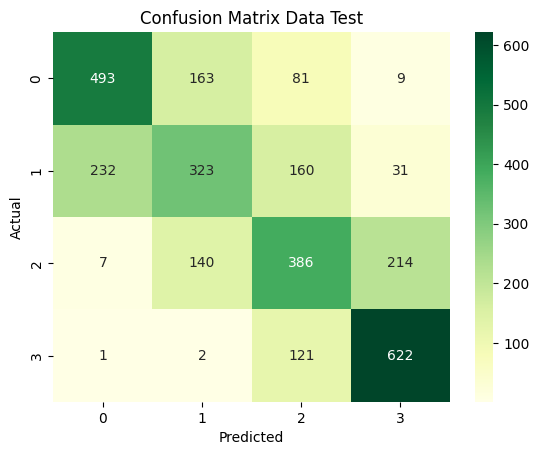

In [270]:
from sklearn import metrics
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
plt.xlabel('Predicted')
plt.ylabel('Actual')
a[0][0].set_title('Confusion Matrix Data Test');

Melakukan hyperparameter tuning

In [271]:
# create the random grid
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [272]:
# tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Train Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(X_test,y_test))
print('Precision:', precision_score(y_test, grid_search.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, grid_search.predict(X_test), average='macro'))
print('F1-Score:', f1_score(y_test, grid_search.predict(X_test), average='macro'))
print('GAP:', grid_search.best_score_ - grid_search.score(X_test,y_test))

Best Parameters: {'C': 100}
Train Score: 0.6115712159233448
Test Score: 0.6117252931323283
Precision: 0.6033552107815363
Recall: 0.6117607157853936
F1-Score: 0.6054709693334478
GAP: -0.00015407720898341637


In [273]:
# cek performa model di data test
y_pred = grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       746
           1       0.51      0.44      0.47       746
           2       0.52      0.51      0.51       747
           3       0.71      0.83      0.77       746

    accuracy                           0.61      2985
   macro avg       0.60      0.61      0.61      2985
weighted avg       0.60      0.61      0.61      2985



Setelah dihyperparameter tuning, score precision, recall dan f1-score mengalami kenaikan

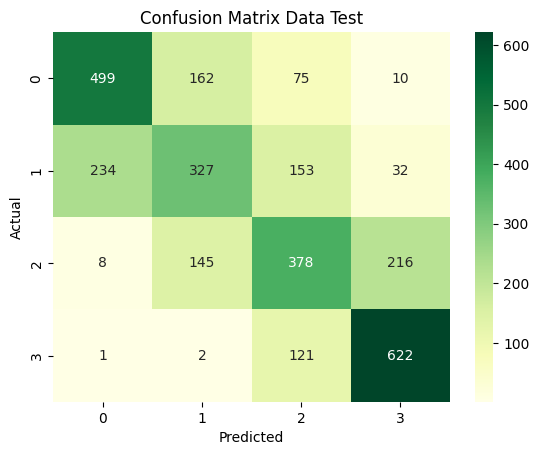

In [274]:
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
plt.xlabel('Predicted')
plt.ylabel('Actual')
a[0][0].set_title('Confusion Matrix Data Test');

# Model Gradient Boosting Classifier & Hyperparameter Tuning

In [275]:
model2 = GradientBoostingClassifier()

In [276]:
model2.fit(X_train, y_train)

GradientBoostingClassifier()

In [277]:
# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7681742043551089

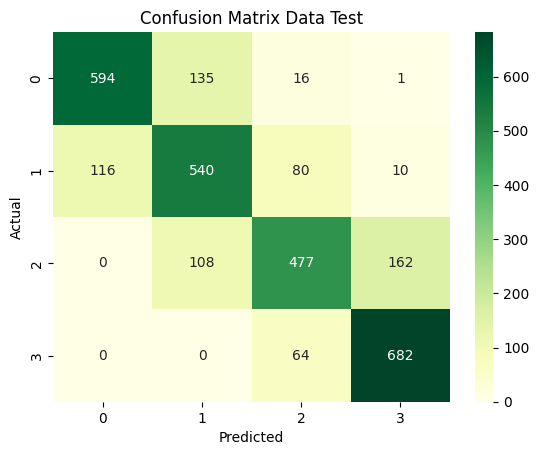

In [278]:
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_2 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
plt.xlabel('Predicted')
plt.ylabel('Actual')
a[0][0].set_title('Confusion Matrix Data Test');

Melakukan hyperparameter tuning

In [279]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [280]:
# Initialize GridSearchCV
gb_grid = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [281]:
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [282]:
# Get the best parameters and best model
best_params = gb_grid.best_params_
best_model = gb_grid.best_estimator_

In [283]:
# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)

In [284]:
# tampilkan parameter terbaik
print("Best Parameters:", gb_grid.best_params_)
print("Train Score:", gb_grid.best_score_)
print("Test Score:", gb_grid.score(X_test,y_test))
print('Precision:', precision_score(y_test, gb_grid.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, gb_grid.predict(X_test), average='macro'))
print('F1-Score:', f1_score(y_test, gb_grid.predict(X_test), average='macro'))
print('GAP:', gb_grid.best_score_ - gb_grid.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Train Score: 0.7648814394282
Test Score: 0.7698492462311558
Precision: 0.771617135467647
Recall: 0.7699017697241154
F1-Score: 0.7667051313221019
GAP: -0.004967806802955832


In [285]:
# cek performa model di data test
y_pred = gb_grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       746
           1       0.69      0.74      0.72       746
           2       0.76      0.61      0.68       747
           3       0.78      0.93      0.85       746

    accuracy                           0.77      2985
   macro avg       0.77      0.77      0.77      2985
weighted avg       0.77      0.77      0.77      2985



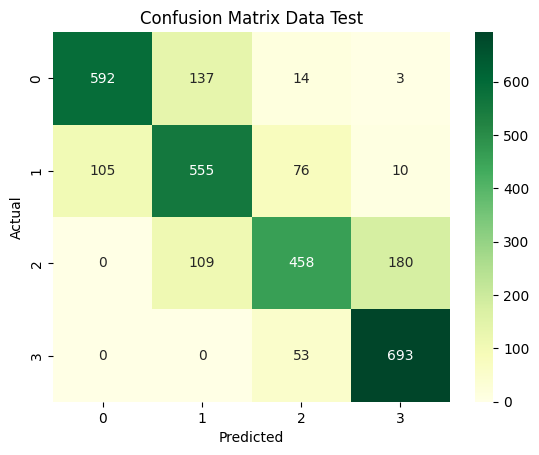

In [286]:
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_2 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
plt.xlabel('Predicted')
plt.ylabel('Actual')
a[0][0].set_title('Confusion Matrix Data Test');

# Model Extra Trees Classifier & Hyperparameter Tuning

In [287]:
model3 = ExtraTreesClassifier()

In [288]:
model3.fit(X_train, y_train)

ExtraTreesClassifier()

In [289]:
# Make predictions on the test set
y_pred = model3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.749748743718593

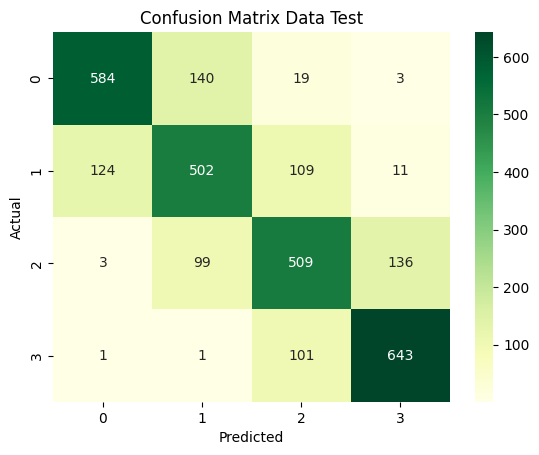

In [290]:
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_3 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
plt.xlabel('Predicted')
plt.ylabel('Actual')
a[0][0].set_title('Confusion Matrix Data Test');

Melakukan hyperparameter tuning

In [291]:
# create the random grid
params = {'n_estimators': [10,50,100],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth':[16,32, None],
          'min_samples_split': [2,4,6],
          'min_samples_leaf': [1,5,10],
          'max_features': ['sqrt', 'log2', None]}

In [294]:
etc_grid = GridSearchCV(model3, params, cv=10, n_jobs=-1)

In [295]:
etc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [16, 32, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]})

In [297]:
# tampilkan parameter terbaik
print("Best Parameters:", etc_grid.best_params_)
print("Train Score:", etc_grid.best_score_)
print("Test Score:", etc_grid.score(X_test,y_test))
print('Precision:', precision_score(y_test, etc_grid.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, etc_grid.predict(X_test), average='macro'))
print('F1-Score:', f1_score(y_test, etc_grid.predict(X_test), average='macro'))
print('GAP:', etc_grid.best_score_ - etc_grid.score(X_test,y_test))

Best Parameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 100}
Train Score: 0.7688140843688457
Test Score: 0.7681742043551089
Precision: 0.7695554361791485
Recall: 0.7682153995786543
F1-Score: 0.7665468837487224
GAP: 0.0006398800137368266


In [298]:
# cek performa model di data test
y_pred = etc_grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       746
           1       0.69      0.74      0.71       746
           2       0.75      0.65      0.69       747
           3       0.80      0.90      0.85       746

    accuracy                           0.77      2985
   macro avg       0.77      0.77      0.77      2985
weighted avg       0.77      0.77      0.77      2985



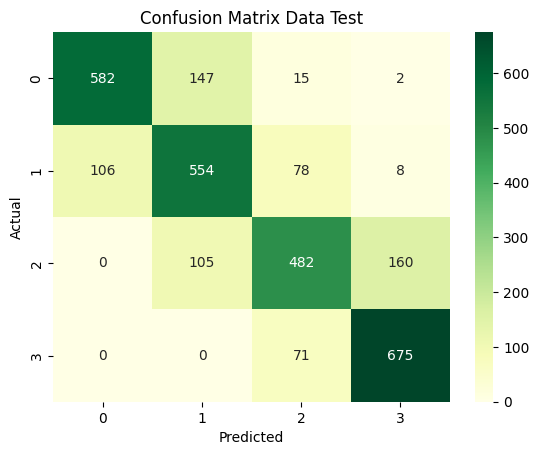

In [300]:
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)
# plotting confusion matrix for the different models for the Testing Data
plot_3 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
plt.xlabel('Predicted')
plt.ylabel('Actual')
a[0][0].set_title('Confusion Matrix Data Test');

# Kesimpulan

Berdasarkan percobaan pembuatan model ini dapat disimpulkan bahwa model GradientBoostingClassifier berkerja lebih baik dalam memprediksi risk credit score.
Berikut adalah perbandingan antara Gradient Boosting Classifier dengan LogisticRegression:

1. **Gradient Boosting Classiefier**: Accuracy lebih baik dengan nilai 0.77,  Precision lebih baik dengan nilai 0.83, Recall 0.81, dan F1-score bernilai 0.82

2. **Logistic Regression**: Accuracy bernilai 0.66, Precision bernilai 0.65, Recall 0.68, dan F1-score 0.66
